<a href="https://colab.research.google.com/github/mariaimr/Monografia-UdeA/blob/main/Monografia_Credit_Card_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

replicating local resources


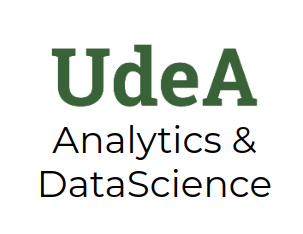

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

Image("local/imgs/udea-datascience.png")

**Materia:** Aprendizaje Automático I

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

*   **Nombres Completos**: Maria Isabel Martínez Rendón
*   **Número de Cédula**: 1046912393


*   **Nombres Completos**: Santiago Felipe Rosales Guerrero
*   **Número de Cédula**: 1085334424

## Librerías y configuraciones previas


In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split
import multiprocessing

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from scipy import special
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
from collections import Counter
import statsmodels.api as sm
import joblib



#support vector machine
from sklearn.svm import LinearSVC

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


# ==============================================================================
#mejores parametros
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Librerias para sobremuestreo
# ==============================================================================
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestClassifier

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
#para procesar atípicos
from sklearn.neighbors import LocalOutlierFactor # Algoritmo LOF

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
import os
drive.mount('/content/drive/')
#kaggle_monografia

Mounted at /content/drive/


##Funciones

In [5]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [6]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [7]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC (característica operativa del receptor)')
    plt.legend()
    plt.show()

#Credit Card Approval Prediction


## 1. Descripción de la base de datos

**Contexto**

Las tarjetas de crédito son un método de control de riesgos habitual en el sector financiero. Utiliza la información personal y los datos presentados por los solicitantes de tarjetas de crédito para predecir la probabilidad de que se produzcan futuros impagos y se obtengan préstamos de tarjetas de crédito. El banco puede decidir si emite una tarjeta de crédito al solicitante. Las puntuaciones de crédito pueden cuantificar objetivamente la magnitud del riesgo.
 
En general, las tarjetas de puntuación de crédito se basan en datos históricos. Una vez que se encuentran con grandes fluctuaciones económicas. Los modelos anteriores pueden perder su poder predictivo original. El modelo logístico es un método común para la puntuación de crédito. Porque Logistic es adecuado para tareas de clasificación binaria y puede calcular los coeficientes de cada característica. Para facilitar la comprensión y el funcionamiento, la tarjeta de puntuación multiplicará el coeficiente de regresión logística por un valor determinado (como 100) y lo redondeará.
 
En la actualidad, con el desarrollo de los algoritmos de aprendizaje automático. Se han introducido en la puntuación de las tarjetas de crédito más métodos de predicción, como Boosting, Random Forest y Support Vector Machines. Sin embargo, estos métodos no suelen tener una buena transparencia. Puede ser difícil proporcionar a los clientes y a los reguladores una razón para el rechazo o la aceptación.

**Información de atributos**

Base de datos 1 - **application_record:** contiene la información personal de los solicitantes y cuenta con 438.557 registros

**ID (int):** Número de cliente

**CODE_GENDER (object):** Género

**FLAG_OWN_CAR (object):** Tiene carro?

**FLAG_OWN_REALTY (object):** Tiene propiedad?

**CNT_CHILDREN (int):** Número de hijos

**AMT_INCOME_TOTAL (float):** Ingresos anuales

**NAME_INCOME_TYPE (object):** Categoría de ingresos

**NAME_EDUCATION_TYPE (object):** Nivel de educación

**NAME_FAMILY_STATUS (object):** Estado civil 

**NAME_HOUSING_TYPE (object):** Forma de vivir

**DAYS_BIRTH (int):** Cumpleaños Cuenta hacia atrás desde el día actual (0), -1 significa ayer

**DAYS_EMPLOYED (int):** Fecha de inicio del empleo Contar hacia atrás desde el día actual (0). Si es positivo, significa que la persona está actualmente desempleada.

**FLAG_MOBIL (int):** Tiene teléfono celular?

**FLAG_WORK_PHONE (int):** Tiene teléfono de trabajo?

**FLAG_PHONE (int):** Tiene teléfono?

**FLAG_EMAIL (int):** Tiene correo electrónico?

**OCCUPATION_TYPE (object):** Ocupación

**CNT_FAM_MEMBERS (float):** Tamaño de familia

La columna “OCCUPATION_TYPE” tiene 134.000 registros faltantes.

Base de datos 2 - **credit_record:** registra los comportamientos de los usuarios de la tarjeta de crédito y cuenta con 1.048.575 registros.

**ID (int):** Número de cliente

**MONTHS_BALANCE (int):** Mes de registro. El mes de los datos extraídos es el punto de partida, 0 es el mes actual, -1 es el mes anterior, y así sucesivamente

**STATUS (object):** Estado.  0: 1-29 días de atraso , 1: 30-59 días de atraso, 2: 60-89 días de atraso, 3: 90-119 días de atraso, 4: 120-149 días de atraso, 5: Deudas atrasadas o incobrables, canceladas por más de 150 días, C: cancelado ese mes, X: Sin préstamo en el mes

## 2. Carga del dataset

In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/' + input('Input the directory with your Kaggle json file: ') #Dejar input vacío en caso de que se encuentre en la raíz de Drive
!kaggle datasets download -d rikdifos/credit-card-approval-prediction
!unzip \*.zip && rm *.zip

Input the directory with your Kaggle json file: kaggle_monografia
 75% 4.00M/5.32M [00:01<00:00, 4.38MB/s]
100% 5.32M/5.32M [00:01<00:00, 4.03MB/s]
Archive:  credit-card-approval-prediction.zip
  inflating: application_record.csv  
  inflating: credit_record.csv       


In [9]:
banco_credit_record= pd.read_csv('credit_record.csv')
banco_appli_record= pd.read_csv('application_record.csv')

## 3. Exploración del dataset

**Dataset con información crediticia**

In [10]:
banco_credit_record.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [11]:
banco_credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Se grafican los diferentes registros de la variable STATUS dado que será procesada para usarse como variable de salida en este ejercico.

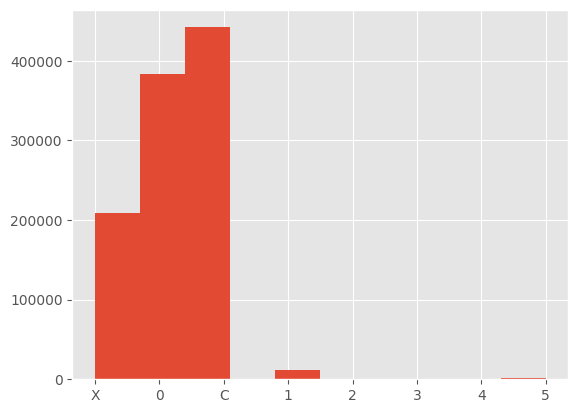

In [12]:
plt.hist(banco_credit_record["STATUS"])
plt.show()

In [13]:
#Cantidad de registros por estado
print("Cantidad de registros por estado:")
banco_credit_record["STATUS"].value_counts()

Cantidad de registros por estado:


C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

Descripción de las categorías de la variable STATUS

0: 1-29 días de atraso

1: 30-59 días de atraso

2: 60-89 días de atraso

3: 90-119 días de atraso

4: 120-149 días de atraso

5: Deudas atrasadas o incobrables, canceladas por más de 150 días

C: cancelado ese mes

X: Sin préstamo en el mes



**Dataset con información personal de los solicitantes**

In [14]:
banco_appli_record.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [15]:
banco_appli_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Se buscan registros duplicados y nulos.

In [16]:
print(f"Cantidad de registros duplicados: {banco_appli_record.duplicated().sum()}")

Cantidad de registros duplicados: 0


In [17]:
print(f"Cantidad de registros nulos:\n\n{banco_appli_record.isnull().sum()}")

Cantidad de registros nulos:

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


Exploración de caracteres especiales por cada una de las variables

In [18]:
lista_banco=[]
for i in banco_appli_record.columns[1:]:
  lista_banco.append({i:list(banco_appli_record[i].value_counts().index)})
display([lista_banco])

[[{'CODE_GENDER': ['F', 'M']},
  {'FLAG_OWN_CAR': ['N', 'Y']},
  {'FLAG_OWN_REALTY': ['Y', 'N']},
  {'CNT_CHILDREN': [0, 1, 2, 3, 4, 5, 7, 9, 12, 6, 14, 19]},
  {'AMT_INCOME_TOTAL': [135000.0,
    157500.0,
    180000.0,
    112500.0,
    225000.0,
    202500.0,
    90000.0,
    270000.0,
    315000.0,
    247500.0,
    67500.0,
    360000.0,
    292500.0,
    126000.0,
    81000.0,
    121500.0,
    144000.0,
    450000.0,
    99000.0,
    171000.0,
    103500.0,
    337500.0,
    166500.0,
    405000.0,
    117000.0,
    76500.0,
    189000.0,
    216000.0,
    162000.0,
    382500.0,
    108000.0,
    148500.0,
    72000.0,
    193500.0,
    94500.0,
    130500.0,
    211500.0,
    153000.0,
    54000.0,
    540000.0,
    175500.0,
    85500.0,
    139500.0,
    234000.0,
    45000.0,
    252000.0,
    675000.0,
    63000.0,
    207000.0,
    184500.0,
    261000.0,
    427500.0,
    238500.0,
    58500.0,
    243000.0,
    256500.0,
    198000.0,
    220500.0,
    49500.0,
    3060

Se analiza si en la variable DAYS_BIRTH hay presencia de datos atípicos o extraños

In [19]:
print(f" Edad máxima: {round((banco_appli_record['DAYS_BIRTH'].min())*-1/365,0)}")
print(f" Edad mínima: {round((banco_appli_record['DAYS_BIRTH'].max())*-1/365,0)}")

 Edad máxima: 69.0
 Edad mínima: 21.0


Se analiza el balance de las categorías en cada variable

In [20]:
for i in banco_appli_record.columns[1:]:
  print(f"{i}\n")
  print(f"{banco_appli_record[i].value_counts()}\n")

CODE_GENDER

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_REALTY

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

CNT_CHILDREN

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

AMT_INCOME_TOTAL

135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

NAME_INCOME_TYPE

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

NAME_EDUCATION_TYPE

Secondary / secondary special    301821
Higher education                 1175

De lo anterior, se observa que no hay presencia de caracteres o datos especiales 

Para la columna "FLAG_MOBILE", se evidencia que todos los datos son "1", por lo tanto se decide no trabajar con ella
 
Se identifica que la columna de "OCCUPATION_TYPE" tiene datos NaN

Respecto a los datos categóricos se observa un desbalanceo pero no se considera relevante

In [21]:
del banco_appli_record["FLAG_MOBIL"]
banco_appli_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION_TYPE  

**Datos númericos** (int,float)

In [22]:
banco_credit_num = banco_appli_record.select_dtypes(include = ["int","float"]).columns.tolist()
banco_credit_num.remove('ID')
banco_appli_record[banco_credit_num].describe()

CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  DAYS_EMPLOYED  \
count  438557.000000      4.385570e+05  438557.000000  438557.000000   
mean        0.427390      1.875243e+05  -15997.904649   60563.675328   
std         0.724882      1.100869e+05    4185.030007  138767.799647   
min         0.000000      2.610000e+04  -25201.000000  -17531.000000   
25%         0.000000      1.215000e+05  -19483.000000   -3103.000000   
50%         0.000000      1.607805e+05  -15630.000000   -1467.000000   
75%         1.000000      2.250000e+05  -12514.000000    -371.000000   
max        19.000000      6.750000e+06   -7489.000000  365243.000000   

       FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  
count    438557.000000  438557.000000  438557.000000    438557.000000  
mean          0.206133       0.287771       0.108207         2.194465  
std           0.404527       0.452724       0.310642         0.897207  
min           0.000000       0.000000       0.000000         1.000000  
25%           0.000000       0.000000       0.000000         2.000000  
50%           0.000000       0.000000       0.000000         2.000000  
75%           0.000000       1.000000       0.000000         3.000000  
max           1.000000       1.000000       1.000000        20.000000

**Datos categóricos** (objeto)

In [23]:
banco_credit_obj = banco_appli_record.select_dtypes(include = ["object"]).columns.tolist()
banco_appli_record[banco_credit_obj].describe()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_INCOME_TYPE  \
count       438557       438557          438557           438557   
unique           2            2               2                5   
top              F            N               Y          Working   
freq        294440       275459          304074           226104   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                          438557             438557             438557   
unique                              5                  5                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                           301821             299828             393831   

       OCCUPATION_TYPE  
count           304354  
unique              18  
top           Laborers  
freq             78240

Se tratan los datos faltantes para la variable "OCCUPATION_TYPE"

In [24]:
#####Se imputan los registros nulos de la columna "OCCUPATION_TYPE" con la moda
banco_appli_record['OCCUPATION_TYPE'].fillna(stats.mode(banco_appli_record['OCCUPATION_TYPE'])[0][0], inplace=True)
banco_appli_record[banco_credit_obj].head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY      NAME_INCOME_TYPE  \
0           M            Y               Y               Working   
1           M            Y               Y               Working   
2           M            Y               Y               Working   
3           F            N               Y  Commercial associate   
4           F            N               Y  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education        Civil marriage   Rented apartment   
1               Higher education        Civil marriage   Rented apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE  
0             NaN  
1             NaN  
2  Security staff  
3     Sales staff  
4     Sales staff

In [25]:
banco_appli_record[banco_credit_obj].describe()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_INCOME_TYPE  \
count       438557       438557          438557           438557   
unique           2            2               2                5   
top              F            N               Y          Working   
freq        294440       275459          304074           226104   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                          438557             438557             438557   
unique                              5                  5                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                           301821             299828             393831   

       OCCUPATION_TYPE  
count           304354  
unique              18  
top           Laborers  
freq             78240

**Conclusión:** luego de probar con tres métodos diferentes (creación nueva clase, imputación por la moda y eliminación de la columna) y realizando pruebas con el modelo de "regresión logística", se observó que los mejores resultados se obtuvieron con la imputación de la moda. Además se consideró como regla de negocio que la ocupación es un factor relevante para la clasificación.

**Procesamiento para obtener variable de salida**

En la columna STATUS del dataset banco_credit_record, se asignará  “1” para los clientes con una deuda superior a los 60 días (cliente no apto) y “0” en cualquier otro caso (cliente apto)

In [26]:
banco_credit_record['STATUS'] = np.where((banco_credit_record['STATUS'] == '2') | (banco_credit_record['STATUS'] == '3' )| (banco_credit_record['STATUS'] == '4' )| (banco_credit_record['STATUS'] == '5'), 1, 0)
banco_credit_record 

ID  MONTHS_BALANCE  STATUS
0        5001711               0       0
1        5001711              -1       0
2        5001711              -2       0
3        5001711              -3       0
4        5001712               0       0
...          ...             ...     ...
1048570  5150487             -25       0
1048571  5150487             -26       0
1048572  5150487             -27       0
1048573  5150487             -28       0
1048574  5150487             -29       0

[1048575 rows x 3 columns]

Se convierte el ID a índice y se valida si en algún mes el usuario tiene una deuda superior a 60 días y se categoriza como cliente no apto

In [27]:
banco_credit_record_pivote = banco_credit_record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS') #ID's SE CONVIERTEN EN INDICES
banco_credit_record_pivote['RESULTADO'] = banco_credit_record_pivote.sum(axis="columns") 
banco_credit_record_pivote['RESULTADO'] = np.where((banco_credit_record_pivote['RESULTADO'] > 0 ),1,0 ) #1 no apto, 0 apto
banco_credit_record_pivote

MONTHS_BALANCE  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  ...   -8  \
ID                                                                ...        
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0   
5001715         NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0   

MONTHS_BALANCE   -7   -6   -5   -4   -3   -2   -1    0  RESULTADO  
ID                                                                 
5001711         NaN  NaN  NaN  NaN  0.0  0.0  0.0  0.0          0  
5001712         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0  
5001713         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0  
5001714         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0  
5001715         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0  
...             ...  ...  ...  ...  ...  ...  ...  ...        ...  
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN          0  
5150483         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0  
5150484         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0  
5150485         NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0          0  
5150487         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0  

[45985 rows x 62 columns]

Se unen los 2 datasets por medio del ID

In [28]:
banco_unido= pd.merge(banco_appli_record, banco_credit_record_pivote["RESULTADO"], on='ID', how='inner')
banco_unido.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1           0           0             NaN              2.0   
1                1           0           0             NaN              2.0   
2                0           0           0  Security staff              2.0   
3                0           1           1     Sales staff              1.0   
4                0           1           1     Sales staff              1.0   

   RESULTADO  
0          0  
1          0  
2          0  
3          0  
4          0

In [29]:
banco_unido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

Se observa que la cantidad de registros disminuye debido a que solo 36.457 de estos están relacionados por el ID 

In [30]:
banco_credit_record['STATUS'] = np.where((banco_credit_record['STATUS'] == '2') | (banco_credit_record['STATUS'] == '3' )| (banco_credit_record['STATUS'] == '4' )| (banco_credit_record['STATUS'] == '5'), 1, 0)
banco_credit_record 

ID  MONTHS_BALANCE  STATUS
0        5001711               0       0
1        5001711              -1       0
2        5001711              -2       0
3        5001711              -3       0
4        5001712               0       0
...          ...             ...     ...
1048570  5150487             -25       0
1048571  5150487             -26       0
1048572  5150487             -27       0
1048573  5150487             -28       0
1048574  5150487             -29       0

[1048575 rows x 3 columns]

In [31]:
banco_unido["RESULTADO"].value_counts()

0    35841
1      616
Name: RESULTADO, dtype: int64

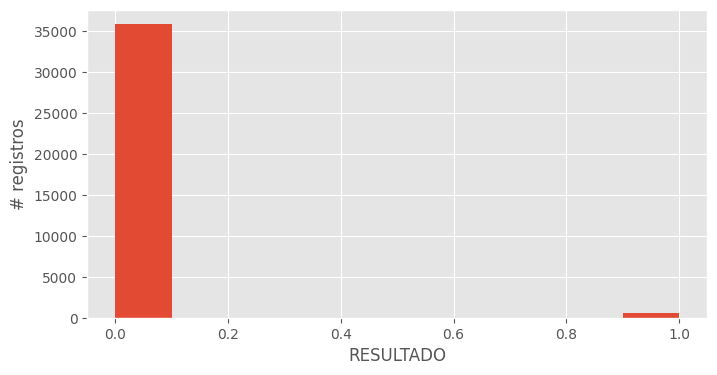

In [32]:
plt.figure(figsize=(8,4))
plt.hist(banco_unido["RESULTADO"])
plt.ylabel('# registros')
plt.xlabel('RESULTADO')
plt.show()

De los anteriores datos, se observa el desbalanceo de la variable de salida

Se elimina la variable ID, ya que no es relevante para el modelo y se crean variables dummies de las variables categóricas

In [33]:
del banco_unido["ID"]
banco_unido_codi = pd.get_dummies(banco_unido, drop_first=1)
banco_unido_codi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  int64  
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   DAYS_BIRTH                                         36457 non-null  int64  
 3   DAYS_EMPLOYED                                      36457 non-null  int64  
 4   FLAG_WORK_PHONE                                    36457 non-null  int64  
 5   FLAG_PHONE                                         36457 non-null  int64  
 6   FLAG_EMAIL                                         36457 non-null  int64  
 7   CNT_FAM_MEMBERS                                    36457 non-null  float64
 8   RESULTADO                                          36457 non-null  int64  
 9   CODE_G

**Matriz de correlación**

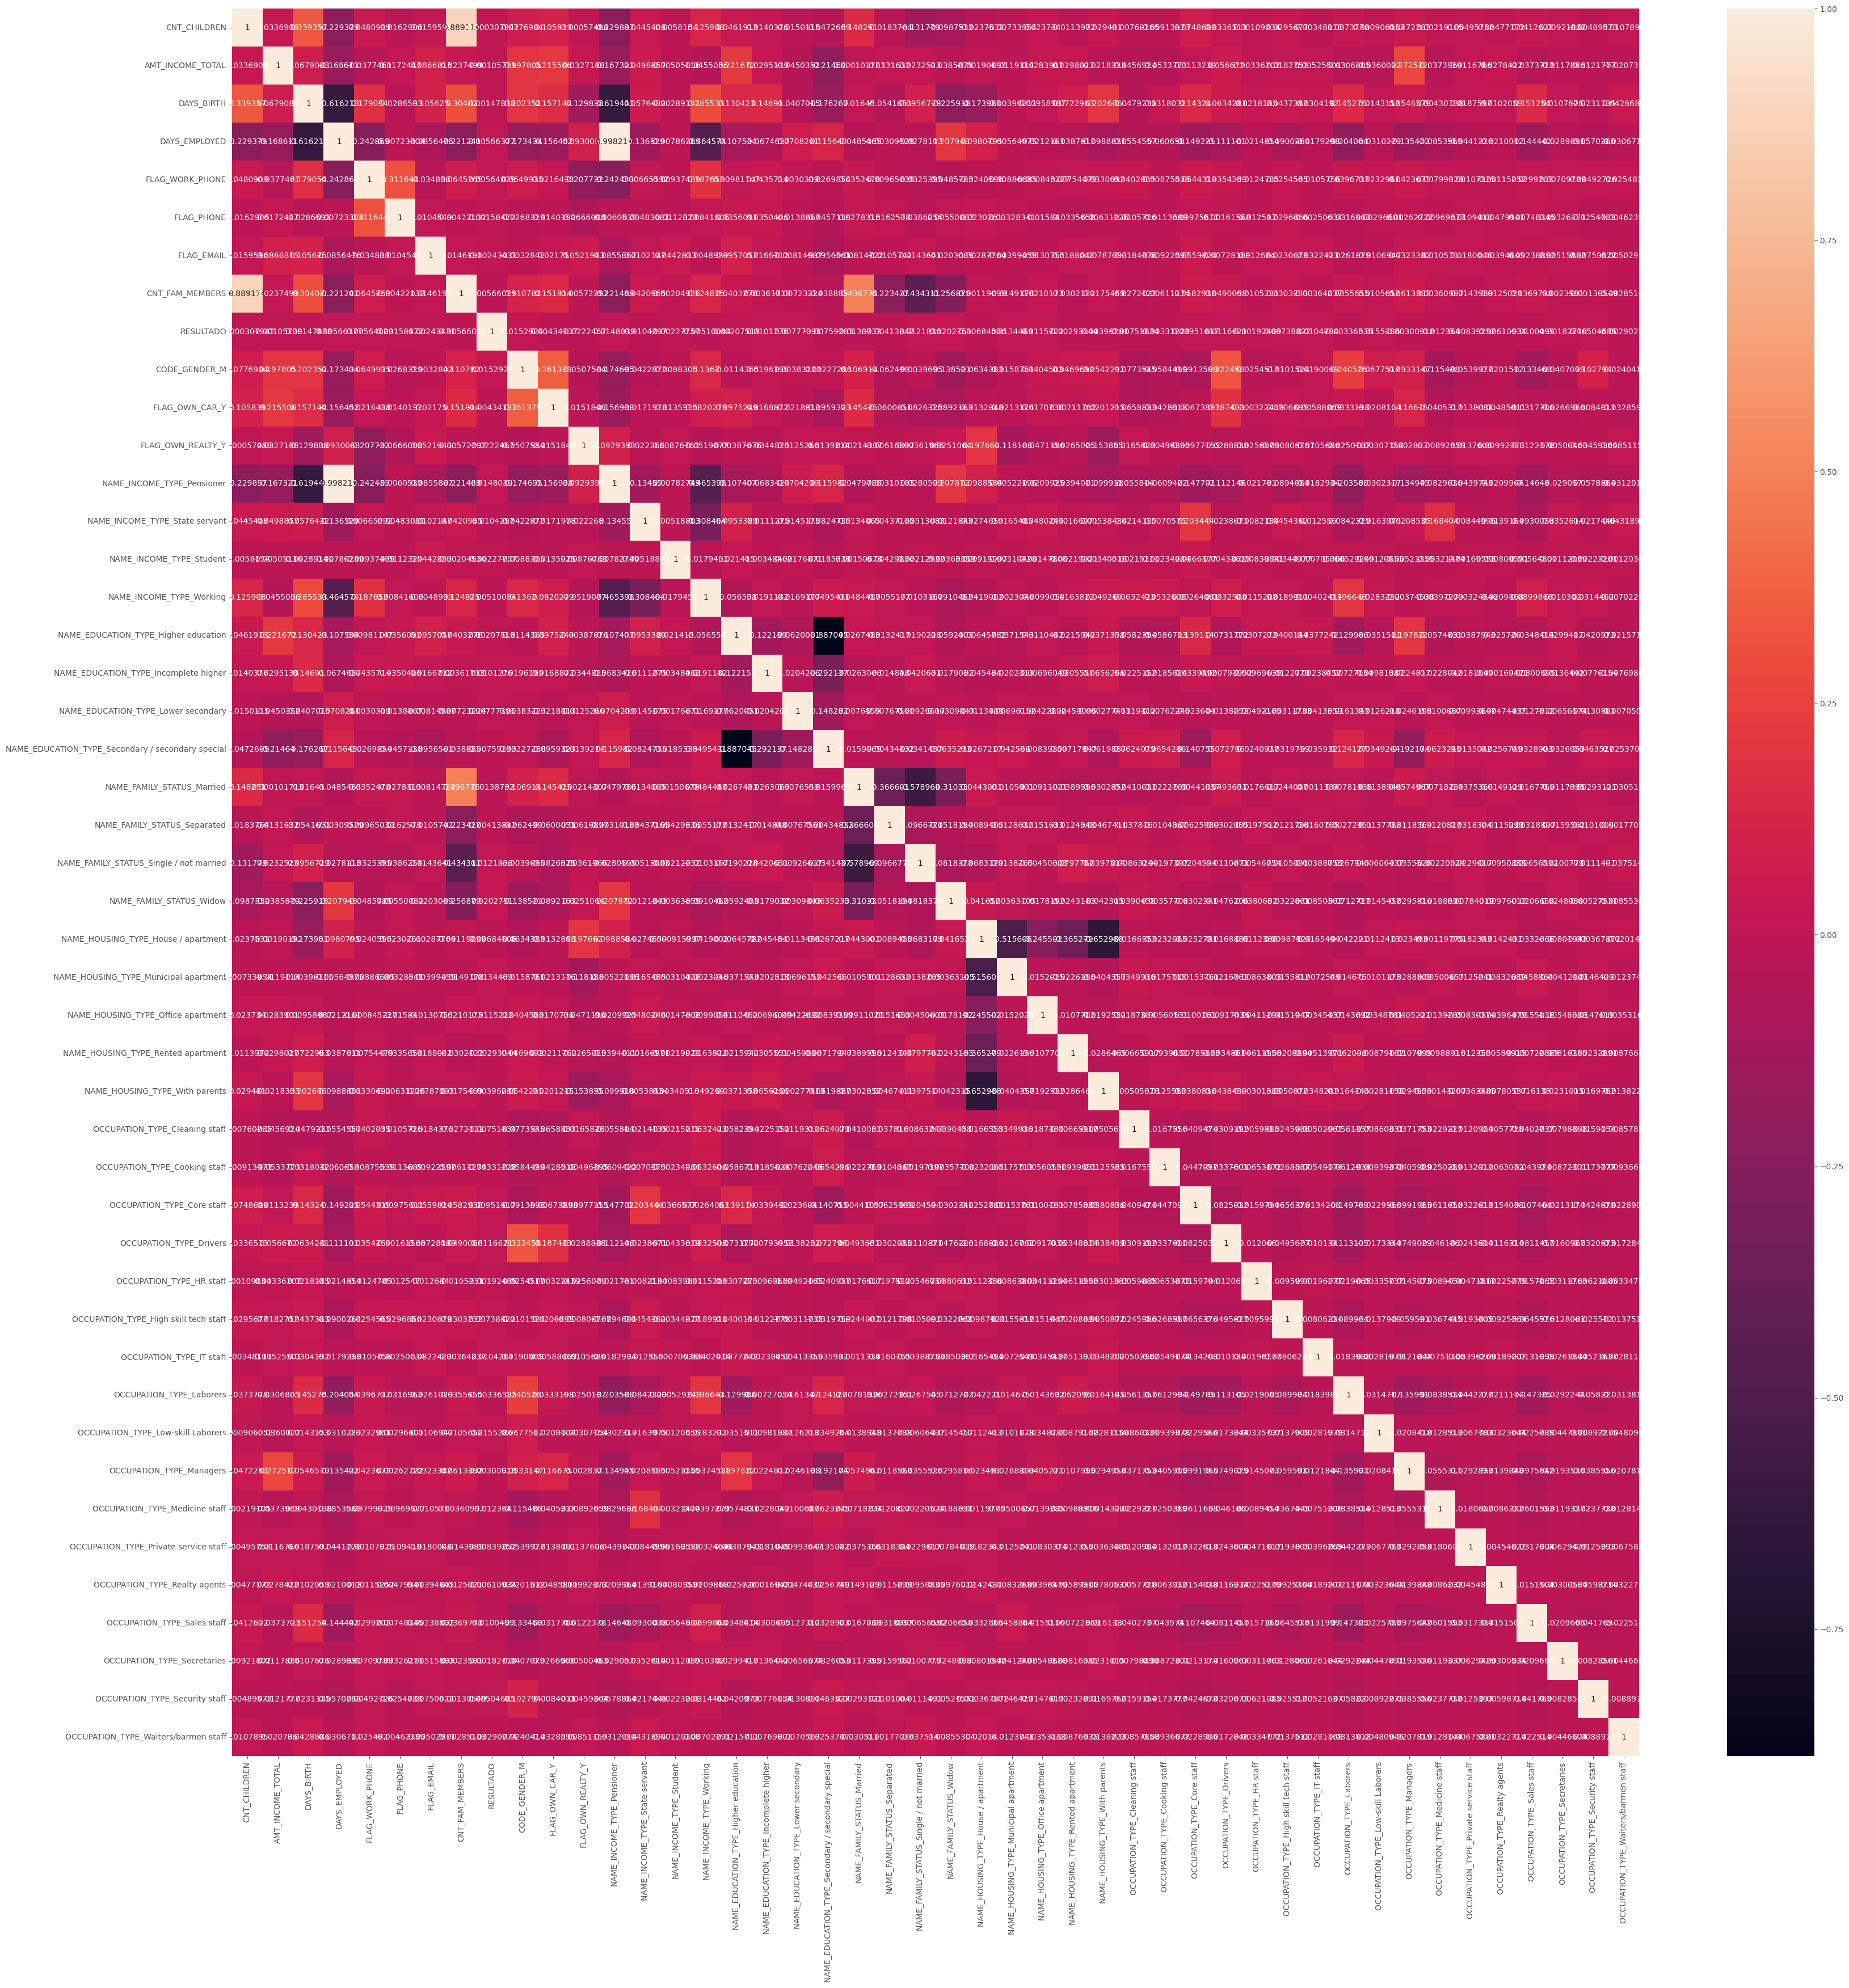

In [34]:
matriz_Correlacion_banco = banco_unido_codi.corr()

plt.figure(figsize=(40,40))

ax = sns.heatmap(matriz_Correlacion_banco, annot=True, fmt='g', xticklabels = banco_unido_codi.columns, yticklabels = banco_unido_codi.columns)
plt.show()

De la matríz de correlación, se observa que:

la variable de "CNT_CHILDREN" (cantidad de hijos) tiene una alta correlación con la variable "CNT_FAM_MEMBERS" (cantidad de miembros de la familia).

la variable de "DAYS_EMPLOYED" (Días empleo/desempleo) tiene una alta correlación con la variable "NAME_INCOME_TYPE_Pensioner" (Pensionados).

Debido a la alta correlación entre las variables "CNT_FAM_MEMBERS" y "CNT_CHILDREN" (0.88) y entre las variables "NAME_INCOME_TYPE_Pensioner" y "DAYS_EMPLOYED" (0.99) se decide eliminar las características "CNT_CHILDREN" y "NAME_INCOME_TYPE_Pensioner".


In [35]:
del banco_unido_codi["CNT_CHILDREN"]
banco_credit_num.remove('CNT_CHILDREN')
del banco_unido_codi["NAME_INCOME_TYPE_Pensioner"]

**Análisis de entropía**

se realiza el análisis de la entropía relativa

In [36]:
caracteristicas_entropia = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS"]
features = banco_unido_codi[caracteristicas_entropia]

In [37]:
MM = MinMaxScaler()
features_normalizado = MM.fit_transform(features)
features_normalizado = pd.DataFrame(features_normalizado, columns = features.columns)

In [38]:
entropia_relativa = []

for _,n in enumerate(caracteristicas_entropia):
  for _,m in enumerate(caracteristicas_entropia):
    entropia_R = special.rel_entr(features_normalizado[n], features_normalizado[m])
    entropia_R = pd.DataFrame(entropia_R).replace(np.inf,0) # Reemplazamos los valores infinitos o inf por 0
    entropia_R = entropia_R.replace(-np.inf,0) # Reemplazamos los valores infinitos negativos o -inf por 0
    suma_entropia_R = entropia_R.sum()/features_normalizado.shape[0]
    entropia_relativa.append(suma_entropia_R)

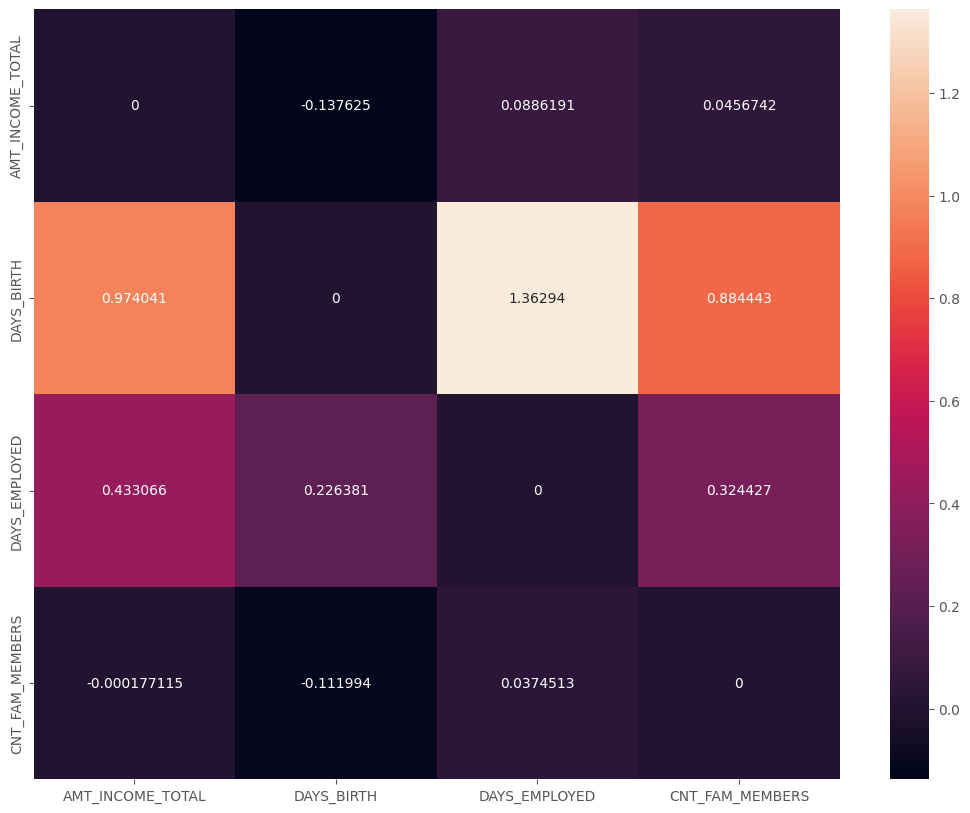

In [39]:
entropia_relativa = np.asarray(entropia_relativa)
entropia_relativa = entropia_relativa.reshape(features_normalizado.shape[1],features_normalizado.shape[1])
entropia_relativa = pd.DataFrame(entropia_relativa, index = caracteristicas_entropia, columns = caracteristicas_entropia)

plt.figure(figsize=(13,10))
ax = sns.heatmap(entropia_relativa, annot=True, fmt='g', xticklabels = caracteristicas_entropia, yticklabels = caracteristicas_entropia)
plt.show()

De lo anterior, se puede apreciar que la variable DAYS_BIRTH tiene una entropía alta en relación a las demás características, por lo que se estará analizando con la selección de características si esta variable aporta o no información.

**Selección de características**

Se realiza selección de caracteristicas por información mutua para identificar las variables que describen la base de datos.

In [40]:
Y = banco_unido_codi['RESULTADO']
seleccion = mutual_info_classif(features, Y, discrete_features = 'auto', n_neighbors = 3)

In [41]:
Tabla_concatenada = pd.concat([pd.DataFrame(features.columns, columns = ['Característica']), 
                               pd.DataFrame(seleccion, columns = ['Información Mutua'])], 
                              axis = 1)
Tabla_concatenada

Característica  Información Mutua
0  AMT_INCOME_TOTAL           0.000941
1        DAYS_BIRTH           0.018237
2     DAYS_EMPLOYED           0.009960
3   CNT_FAM_MEMBERS           0.003608

Dados los valores de la información mutua, no se descarta la variable DAYS_BIRTH.

**Selección de características categóricas**

Se realiza selección de características categóricas por información mutua para identificar las variables que describen la base de datos.

In [42]:
caracteristicas_total=set(banco_unido_codi.columns)
caracteristicas_entropia = set(["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS"])

caracteristicas_entropia_categoricas = caracteristicas_total-caracteristicas_entropia
features_cat = banco_unido_codi[caracteristicas_entropia_categoricas]

In [43]:
Y = banco_unido_codi['RESULTADO']
seleccion = mutual_info_classif(features_cat, Y, discrete_features = 'auto', n_neighbors = 3)

In [44]:
Tabla_concatenada = pd.concat([pd.DataFrame(features_cat.columns, columns = ['Característica']), 
                               pd.DataFrame(seleccion, columns = ['Información mutua'])], 
                              axis = 1)
Tabla_concatenada.sort_values(by ='Información mutua', ascending=False).head(10)

Característica  Información mutua
8                                           RESULTADO           0.085716
9                 NAME_HOUSING_TYPE_House / apartment           0.006629
23                                  FLAG_OWN_REALTY_Y           0.006427
29  NAME_EDUCATION_TYPE_Secondary / secondary special           0.004936
1                            NAME_INCOME_TYPE_Working           0.004762
20                         NAME_FAMILY_STATUS_Married           0.004717
18                                     FLAG_OWN_CAR_Y           0.002434
3                                       CODE_GENDER_M           0.001780
33                     NAME_INCOME_TYPE_State servant           0.001690
0                                     FLAG_WORK_PHONE           0.001633

No se evidencia información mutua alta entre las variables categóricas por lo que se decide trabajar con todas.

**Eliminación datos atípicos**

Identificación y eliminación con el método LOF (Local Outlier Factor)

In [45]:
LOF_banco = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 0.05, metric = 'euclidean') 
filtrado_banco = LOF_banco.fit_predict(banco_unido_codi) # Se realiza la predicción de los datos atípicos
NOF_banco = LOF_banco.negative_outlier_factor_ 

radio_outlier_banco = (NOF_banco.max() - NOF_banco)/(NOF_banco.max() - NOF_banco.min()) # radio de detección de datos atípicos
ground_truth_banco = np.ones(len(banco_unido_codi), dtype = int) 

n_errors_banco = (filtrado_banco != ground_truth_banco).sum() # número de datos atípicos

print("Detección: ", filtrado_banco)
print("Factores atípicos negativos: ", NOF_banco)
print("Número de muestras o filas con datos atípicos: ", n_errors_banco)

Detección:  [ 1  1 -1 ...  1  1  1]
Factores atípicos negativos:  [-2.02993715e+00 -2.02993715e+00 -2.99943345e+12 ... -1.00000000e+00
 -1.00000000e+00 -1.28497058e+00]
Número de muestras o filas con datos atípicos:  1820


Se eliminan los 1820 datos atípicos encontrados en el paso anterior

In [46]:
pos_banco = np.where(filtrado_banco == ground_truth_banco) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos_banco = np.asarray(pos_banco)
pos_banco = np.hstack(pos_banco)

datos_sin_outliers_LOF_banco = banco_unido_codi.loc[pos_banco, :]
print(f"Número de muestras sin outliers: {datos_sin_outliers_LOF_banco.shape[0]}\n")
display(datos_sin_outliers_LOF_banco)
print(f"\nTamaño de base de datos original: {banco_unido_codi.shape}")
print(f"Tamaño de base de datos sin outliers: {datos_sin_outliers_LOF_banco.shape}") 

Número de muestras sin outliers: 34637



AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
5              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
36452          315000.0      -17348          -2420                0   
36453          157500.0      -12387          -1325                0   
36454          157500.0      -12387          -1325                0   
36455          283500.0      -17958           -655                0   
36456          112500.0       -9188          -1193                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  RESULTADO  CODE_GENDER_M  \
0               0           0              2.0          0              1   
1               0           0              2.0          0              1   
3               1           1              1.0          0              0   
4               1           1              1.0          0              0   
5               1           1              1.0          0              0   
...           ...         ...              ...        ...            ...   
36452           0           0              2.0          1              1   
36453           1           1              2.0          1              0   
36454           1           1              2.0          1              0   
36455           0           0              2.0          1              0   
36456           0           0              1.0          1              1   

       FLAG_OWN_CAR_Y  ...  OCCUPATION_TYPE_Laborers  \
0                   1  ...                         0   
1                   1  ...                         0   
3                   0  ...                         0   
4                   0  ...                         0   
5                   0  ...                         0   
...               ...  ...                       ...   
36452               1  ...                         0   
36453               0  ...                         0   
36454               0  ...                         0   
36455               0  ...                         0   
36456               0  ...                         1   

       OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
0                                       0                         0   
1                                       0                         0   
3                                       0                         0   
4                                       0                         0   
5                                       0                         0   
...                                   ...                       ...   
36452                                   0                         1   
36453                                   0                         0   
36454                                   0                         0   
36455                                   0                         0   
36456                                   0                         0   

       OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
0                                   0                                      0   
1                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
5                                   0                                      0   
...                               ...                                    ...   
36452                               0                                      0   
36453                               1                                      


Tamaño de base de datos original: (36457, 44)
Tamaño de base de datos sin outliers: (34637, 44)


##Pruebas con Regresión logística con datos originales


#### Búsqueda de hiperparámetros

Se reemplazan los valores de la variable de salida por:
0 = APTO
1 = NO_APTO

In [47]:
datos_sin_outliers_LOF_banco["RESULTADO"].replace(0,'APTO', inplace=True)
datos_sin_outliers_LOF_banco["RESULTADO"].replace(1,'NO_APTO', inplace=True)

In [48]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(datos_sin_outliers_LOF_banco.columns)
banco_columns.remove('RESULTADO')

X = datos_sin_outliers_LOF_banco[banco_columns]
y = datos_sin_outliers_LOF_banco['RESULTADO']

In [49]:
banco_clientes_desbalanceo = pd.concat([X, y], axis=1)
banco_clientes_desbalanceo

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
5              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
36452          315000.0      -17348          -2420                0   
36453          157500.0      -12387          -1325                0   
36454          157500.0      -12387          -1325                0   
36455          283500.0      -17958           -655                0   
36456          112500.0       -9188          -1193                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0              2.0              1               1   
1               0           0              2.0              1               1   
3               1           1              1.0              0               0   
4               1           1              1.0              0               0   
5               1           1              1.0              0               0   
...           ...         ...              ...            ...             ...   
36452           0           0              2.0              1               1   
36453           1           1              2.0              0               0   
36454           1           1              2.0              0               0   
36455           0           0              2.0              0               0   
36456           0           0              1.0              1               0   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
5                      1  ...                                   0   
...                  ...  ...                                 ...   
36452                  1  ...                                   0   
36453                  1  ...                                   0   
36454                  1  ...                                   0   
36455                  1  ...                                   0   
36456                  1  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
3                             0                               0   
4                             0                               0   
5                             0                               0   
...                         ...                             ...   
36452                         1                               0   
36453                         0                               1   
36454                         0                               1   
36455                         0                               0   
36456                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
3                                          0                              0   
4                                          0                              0   
5                                          0                              0   
...                                      ...                            .

In [50]:
muestra_banco = banco_clientes_desbalanceo
muestra_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34637 entries, 0 to 36456
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   34637 non-null  float64
 1   DAYS_BIRTH                                         34637 non-null  int64  
 2   DAYS_EMPLOYED                                      34637 non-null  int64  
 3   FLAG_WORK_PHONE                                    34637 non-null  int64  
 4   FLAG_PHONE                                         34637 non-null  int64  
 5   FLAG_EMAIL                                         34637 non-null  int64  
 6   CNT_FAM_MEMBERS                                    34637 non-null  float64
 7   CODE_GENDER_M                                      34637 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     34637 non-null  uint8  
 9   FLAG_O

In [51]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']


In [52]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [53]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [54]:
X_Completo = X
y_Completo = y

In [55]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Validación con modelo Regresión Logística

##### Creación del modelo

In [56]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [57]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 0.001, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'liblinear'}

In [58]:
X = banco_clientes_desbalanceo[banco_columns]
y = banco_clientes_desbalanceo['RESULTADO']

In [59]:
#Datos de entrenamiento y de prueba base de datos completa
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [60]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

Se crea el modelo con los mejores parámetros obtenidos del método anterior ('C': 100, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg')

In [61]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=0.001, multi_class='ovr', random_state=0,
                   solver='liblinear')

##### Accuracy

In [62]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [63]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
0.9818129330254042


##### Balanced accuracy score

In [64]:
y_1[y_1== 'APTO'] = 0
y_test[y_test == 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1
y_test[y_test == 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.5


##### Pérdida de entropía cruzada (Log Loss)

In [65]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.10219097458673779

##### Matriz de confusión

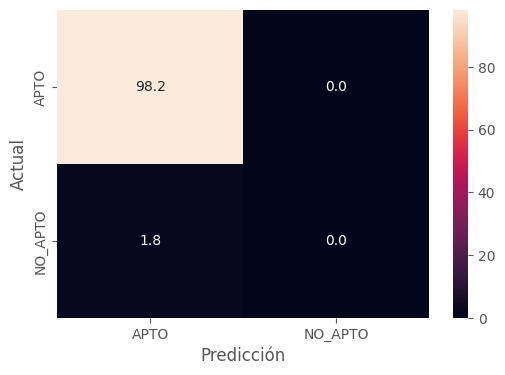

              precision    recall  f1-score   support

        APTO       0.98      1.00      0.99      6802
     NO_APTO       0.00      0.00      0.00       126

    accuracy                           0.98      6928
   macro avg       0.49      0.50      0.50      6928
weighted avg       0.96      0.98      0.97      6928



In [66]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_1)
conf_mat = np.round(((conf_mat/len(y_test))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=banco_clientes_desbalanceo['RESULTADO'].sort_values().unique()
            , yticklabels=banco_clientes_desbalanceo['RESULTADO'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test, y_1, target_names=banco_clientes_desbalanceo['RESULTADO'].sort_values().unique()))

##### Receiver Operating Characteristic (ROC)

In [67]:
#Convertir y_test NO_APTO y APTO en 1 y 0
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.56


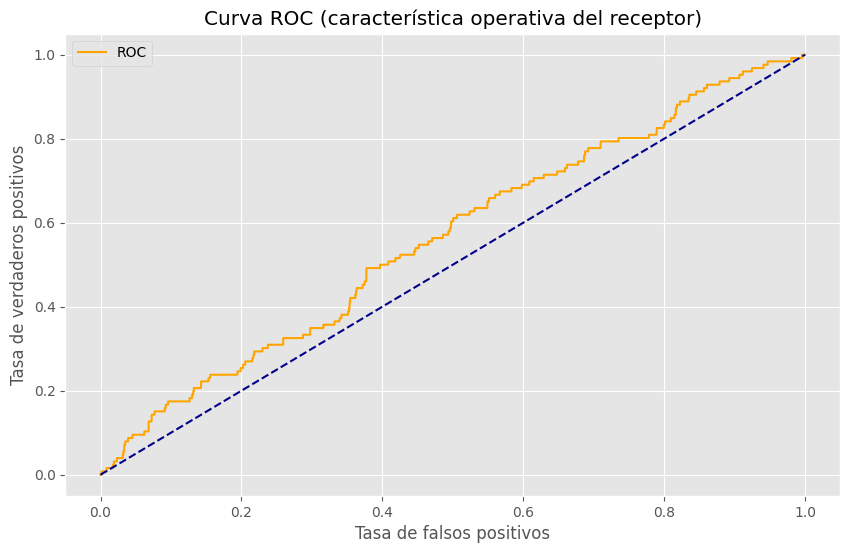

In [68]:
fig = plt.figure(figsize=(10,6))

probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(1))

print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

##### Precision Recall Curve

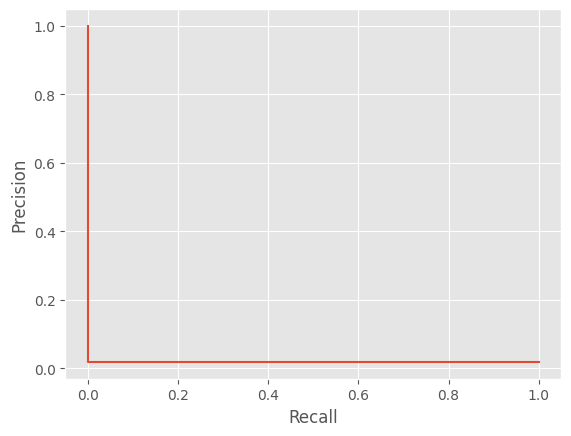

In [69]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Sobremuestreo para solucionar desbalanceo

### RandomOverSampler

In [70]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [71]:
sm = RandomOverSampler( random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'APTO': 34055, 'NO_APTO': 582})
Resampled dataset shape Counter({'APTO': 34055, 'NO_APTO': 34055})


####Busqueda de hiperparámetros 

In [72]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
2              270000.0      -19110          -3051                0   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
68105          292500.0      -12368           -672                0   
68106          112500.0      -20103           -555                0   
68107          450000.0       -9847           -502                0   
68108          270000.0      -19040          -1402                1   
68109          225000.0      -17915          -3366                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0              2.0              1               1   
1               0           0              2.0              1               1   
2               1           1              1.0              0               0   
3               1           1              1.0              0               0   
4               1           1              1.0              0               0   
...           ...         ...              ...            ...             ...   
68105           0           0              5.0              0               0   
68106           0           0              2.0              1               0   
68107           1           1              3.0              1               1   
68108           1           0              3.0              0               0   
68109           0           0              2.0              1               1   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
2                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
...                  ...  ...                                 ...   
68105                  0  ...                                   0   
68106                  1  ...                                   0   
68107                  0  ...                                   0   
68108                  1  ...                                   0   
68109                  1  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
68105                         0                               0   
68106                         0                               0   
68107                         0                               0   
68108                         1                               0   
68109                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            .

In [73]:
banco_clientes_sinteticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   68110 non-null  float64
 1   DAYS_BIRTH                                         68110 non-null  int64  
 2   DAYS_EMPLOYED                                      68110 non-null  int64  
 3   FLAG_WORK_PHONE                                    68110 non-null  int64  
 4   FLAG_PHONE                                         68110 non-null  int64  
 5   FLAG_EMAIL                                         68110 non-null  int64  
 6   CNT_FAM_MEMBERS                                    68110 non-null  float64
 7   CODE_GENDER_M                                      68110 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     68110 non-null  uint8  
 9   FLAG_O

In [74]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [75]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [76]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [77]:
X_Completo = X
y_Completo = y

In [78]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con RandomOverSampler

In [79]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [80]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 1000, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [81]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [82]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [83]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight='balanced', multi_class='multinomial',
                   random_state=0, solver='newton-cg')

#### Accuracy

In [84]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [85]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
0.5938158616508358


#### Balanced accuracy score

In [86]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.5840198365187506


#### Pérdida de entropía cruzada (Log Loss)

In [87]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.6706397874482142

#### Matriz de confusión

In [88]:
y_1 = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

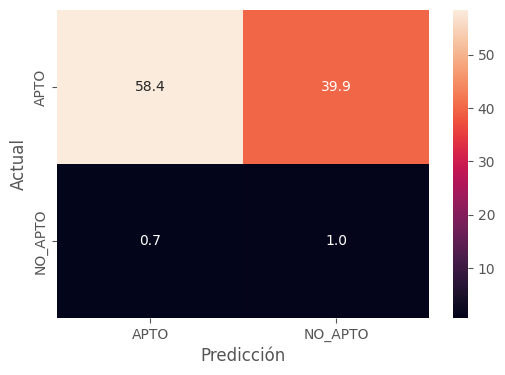

              precision    recall  f1-score   support

        APTO       0.99      0.59      0.74     34055
     NO_APTO       0.02      0.57      0.05       582

    accuracy                           0.59     34637
   macro avg       0.51      0.58      0.39     34637
weighted avg       0.97      0.59      0.73     34637



In [89]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_1)
conf_mat = np.round(((conf_mat/len(y_test))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1)
            , yticklabels=set(y_1)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test, y_1, target_names=set(y_1)))

#### Receiver Operating Characteristic (ROC)

In [90]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.62


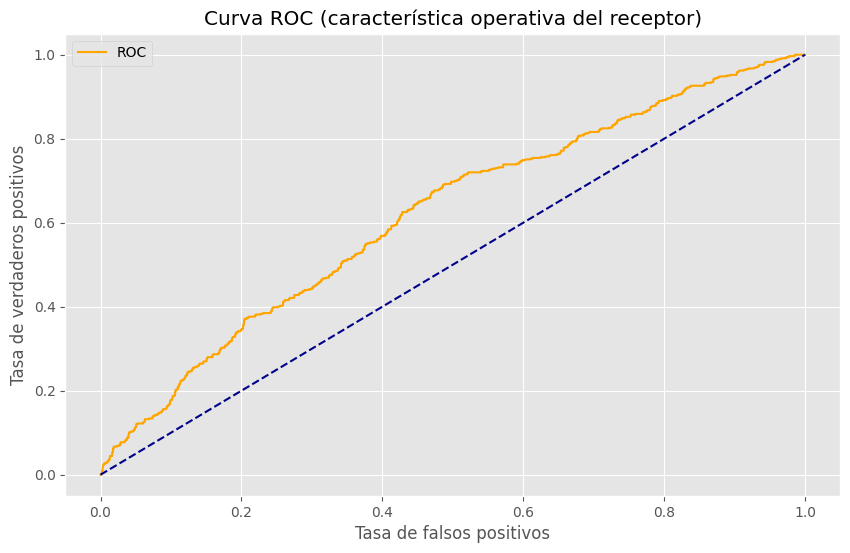

In [91]:
fig = plt.figure(figsize=(10,6))

probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

In [92]:
y_1 = [0 if x== 'APTO' else 1 for x in y_1]
y_test = [0 if x== 'APTO' else 1 for x in y_test]

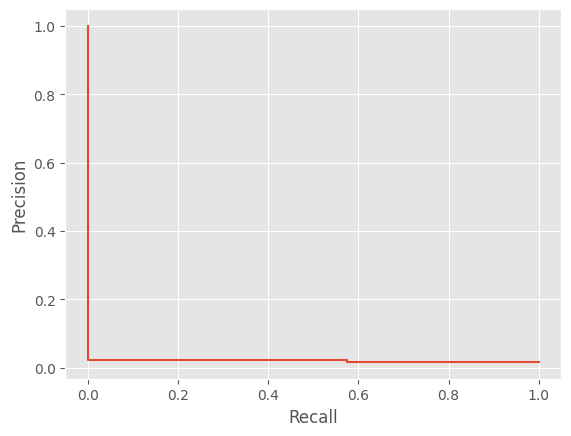

In [93]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### SMOTEN

In [94]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [95]:
sm = SMOTEN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'APTO': 34055, 'NO_APTO': 582})
Resampled dataset shape Counter({'APTO': 34055, 'NO_APTO': 34055})


####Busqueda de hiperparámetros 

In [96]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
2              270000.0      -19110          -3051                0   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
68105          292500.0      -12368           -672                0   
68106          112500.0      -20103           -555                0   
68107           76500.0      -17743          -4205                0   
68108          315000.0      -10499           -545                0   
68109          225000.0      -17915          -3366                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0              2.0              1               1   
1               0           0              2.0              1               1   
2               1           1              1.0              0               0   
3               1           1              1.0              0               0   
4               1           1              1.0              0               0   
...           ...         ...              ...            ...             ...   
68105           0           0              5.0              0               0   
68106           0           0              2.0              1               0   
68107           0           0              2.0              0               1   
68108           0           1              1.0              1               0   
68109           0           0              2.0              1               1   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
2                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
...                  ...  ...                                 ...   
68105                  1  ...                                   0   
68106                  1  ...                                   0   
68107                  0  ...                                   0   
68108                  1  ...                                   0   
68109                  1  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
68105                         0                               0   
68106                         0                               0   
68107                         0                               0   
68108                         0                               0   
68109                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            .

In [97]:
banco_clientes_sinteticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   68110 non-null  float64
 1   DAYS_BIRTH                                         68110 non-null  int64  
 2   DAYS_EMPLOYED                                      68110 non-null  int64  
 3   FLAG_WORK_PHONE                                    68110 non-null  int64  
 4   FLAG_PHONE                                         68110 non-null  int64  
 5   FLAG_EMAIL                                         68110 non-null  int64  
 6   CNT_FAM_MEMBERS                                    68110 non-null  float64
 7   CODE_GENDER_M                                      68110 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     68110 non-null  uint8  
 9   FLAG_O

In [98]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [99]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [100]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [101]:
X_Completo = X
y_Completo = y

In [102]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con SMOTEN

In [103]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [104]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 0.1, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [105]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [106]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [107]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

#### Accuracy

In [108]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [109]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
0.7548863931633802


#### Balanced accuracy score

In [110]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.5164683317515985


#### Pérdida de entropía cruzada (Log Loss)

In [111]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.44324983643677945

#### Matriz de confusión

In [112]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

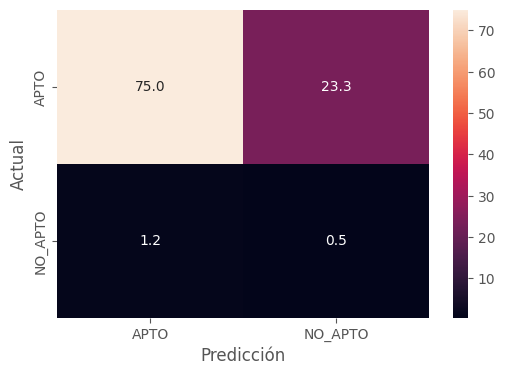

              precision    recall  f1-score   support

        APTO       0.98      0.76      0.86     34055
     NO_APTO       0.02      0.27      0.04       582

    accuracy                           0.75     34637
   macro avg       0.50      0.52      0.45     34637
weighted avg       0.97      0.75      0.85     34637



In [113]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [114]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.54


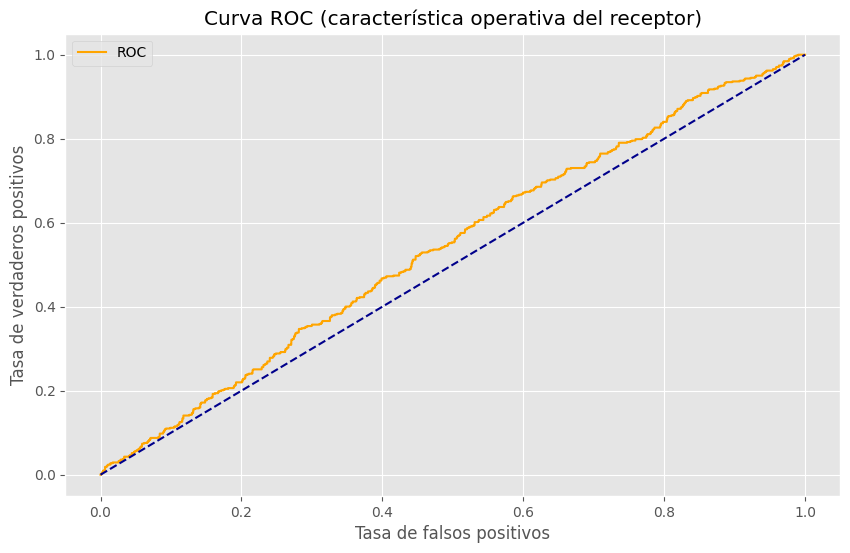

In [115]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

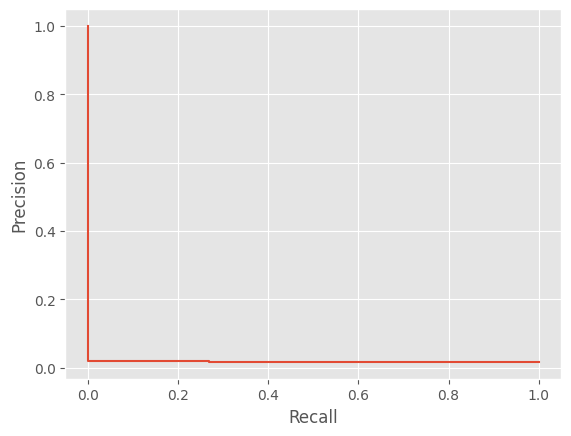

In [116]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### KMeansSMOTE

In [117]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [118]:
sm = KMeansSMOTE(kmeans_estimator=1, random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'APTO': 34055, 'NO_APTO': 582})
Resampled dataset shape Counter({'APTO': 34055, 'NO_APTO': 34055})


####Busqueda de hiperparámetros 

In [119]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
2              270000.0      -19110          -3051                0   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
68105          180000.0      -10804          -1281                0   
68106          180000.0      -10630          -1569                0   
68107          112500.0      -20285          -1734                1   
68108          202500.0      -10226          -2164                0   
68109          292500.0      -12368           -672                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0         2.000000              1               1   
1               0           0         2.000000              1               1   
2               1           1         1.000000              0               0   
3               1           1         1.000000              0               0   
4               1           1         1.000000              0               0   
...           ...         ...              ...            ...             ...   
68105           0           0         2.000000              0               0   
68106           0           0         2.688351              0               0   
68107           1           0         2.000000              0               0   
68108           0           0         2.000000              0               0   
68109           0           0         5.000000              0               0   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
2                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
...                  ...  ...                                 ...   
68105                  0  ...                                   0   
68106                  0  ...                                   0   
68107                  0  ...                                   0   
68108                  0  ...                                   0   
68109                  0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
68105                         0                               0   
68106                         0                               0   
68107                         0                               0   
68108                         0                               0   
68109                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            .

In [120]:
banco_clientes_sinteticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   68110 non-null  float64
 1   DAYS_BIRTH                                         68110 non-null  int64  
 2   DAYS_EMPLOYED                                      68110 non-null  int64  
 3   FLAG_WORK_PHONE                                    68110 non-null  int64  
 4   FLAG_PHONE                                         68110 non-null  int64  
 5   FLAG_EMAIL                                         68110 non-null  int64  
 6   CNT_FAM_MEMBERS                                    68110 non-null  float64
 7   CODE_GENDER_M                                      68110 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     68110 non-null  uint8  
 9   FLAG_O

In [121]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [122]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [123]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [124]:
X_Completo = X
y_Completo = y

In [125]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con KMeansSMOTE

In [126]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [127]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 10, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}


Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [128]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [129]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [130]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced', multi_class='multinomial',
                   random_state=0, solver='newton-cg')

#### Accuracy

In [131]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [132]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
0.7904552934722984


#### Balanced accuracy score

In [133]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.537934415774765


#### Pérdida de entropía cruzada (Log Loss)

In [134]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.48572996348874947

#### Matriz de confusión

In [135]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

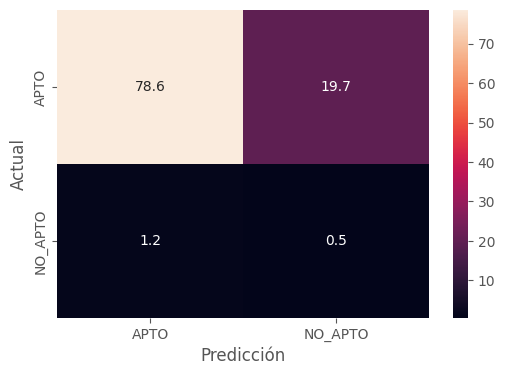

              precision    recall  f1-score   support

        APTO       0.98      0.80      0.88     34055
     NO_APTO       0.02      0.28      0.04       582

    accuracy                           0.79     34637
   macro avg       0.50      0.54      0.46     34637
weighted avg       0.97      0.79      0.87     34637



In [136]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [137]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.58


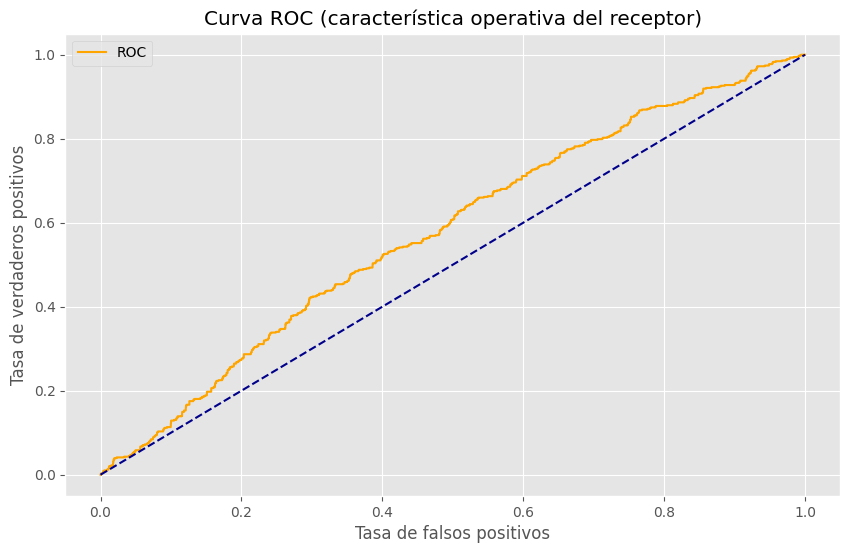

In [138]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

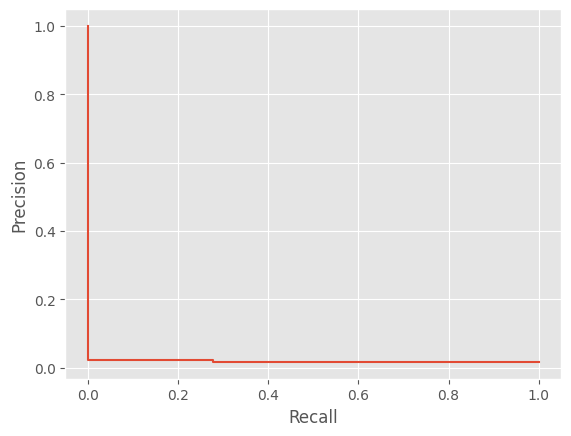

In [139]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### BorderlineSMOTE

In [140]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']


In [141]:
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'APTO': 34055, 'NO_APTO': 582})
Resampled dataset shape Counter({'APTO': 34055, 'NO_APTO': 34055})


####Busqueda de hiperparámetros 

In [142]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
2              270000.0      -19110          -3051                0   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
68105           90000.0      -22859         365243                0   
68106          315000.0      -13557           -586                1   
68107          108000.0      -16975           -939                0   
68108          202500.0      -14523          -3420                0   
68109          135000.0      -20710         365243                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0         2.000000              1               1   
1               0           0         2.000000              1               1   
2               1           1         1.000000              0               0   
3               1           1         1.000000              0               0   
4               1           1         1.000000              0               0   
...           ...         ...              ...            ...             ...   
68105           0           0         1.470732              0               0   
68106           1           0         2.000000              0               1   
68107           0           0         2.218196              0               1   
68108           0           0         2.000000              0               0   
68109           0           0         2.298045              0               0   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
2                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
...                  ...  ...                                 ...   
68105                  1  ...                                   0   
68106                  0  ...                                   0   
68107                  0  ...                                   0   
68108                  1  ...                                   0   
68109                  0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
68105                         0                               0   
68106                         0                               0   
68107                         0                               0   
68108                         0                               0   
68109                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            .

In [143]:
banco_clientes_sinteticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   68110 non-null  float64
 1   DAYS_BIRTH                                         68110 non-null  int64  
 2   DAYS_EMPLOYED                                      68110 non-null  int64  
 3   FLAG_WORK_PHONE                                    68110 non-null  int64  
 4   FLAG_PHONE                                         68110 non-null  int64  
 5   FLAG_EMAIL                                         68110 non-null  int64  
 6   CNT_FAM_MEMBERS                                    68110 non-null  float64
 7   CODE_GENDER_M                                      68110 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     68110 non-null  uint8  
 9   FLAG_O

In [144]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [145]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [146]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [147]:
X_Completo = X
y_Completo = y

In [148]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con BorderlineSMOTE

In [149]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [150]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 100, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'newton-cg'}


Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [151]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [152]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [153]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=100, multi_class='ovr', random_state=0, solver='newton-cg')

#### Accuracy

In [154]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [155]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
0.8480237895891677


#### Balanced accuracy score

In [156]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.5258337912039399


#### Pérdida de entropía cruzada (Log Loss)

In [157]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.3972640321848762

#### Matriz de confusión

In [158]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

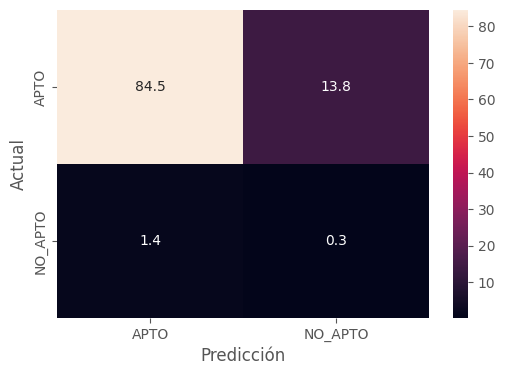

              precision    recall  f1-score   support

        APTO       0.98      0.86      0.92     34055
     NO_APTO       0.02      0.19      0.04       582

    accuracy                           0.85     34637
   macro avg       0.50      0.53      0.48     34637
weighted avg       0.97      0.85      0.90     34637



In [159]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [160]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.56


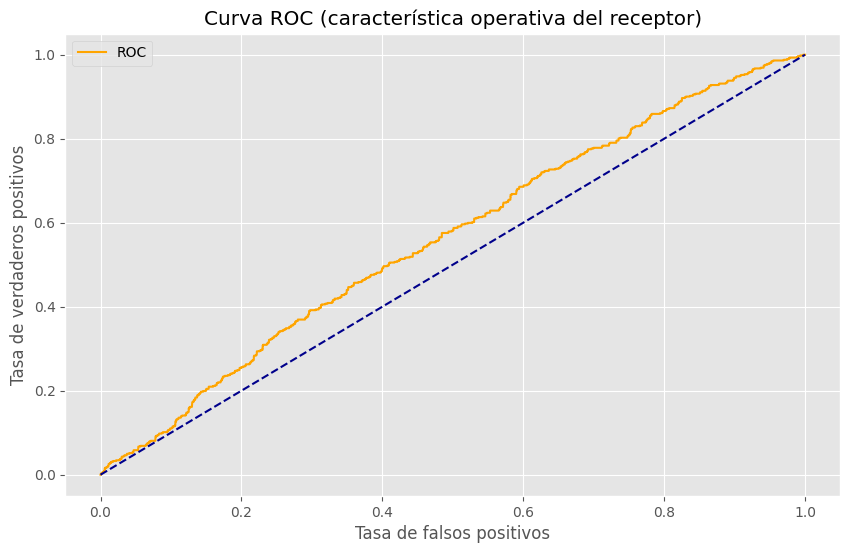

In [161]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

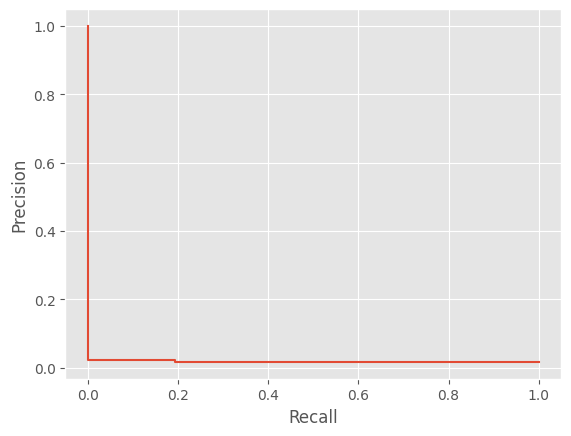

In [162]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### SMOTENC

In [163]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [164]:
sm = SMOTENC(random_state=42, categorical_features=[0])
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'APTO': 34055, 'NO_APTO': 582})
Resampled dataset shape Counter({'APTO': 34055, 'NO_APTO': 34055})


####Busqueda de hiperparámetros 

In [165]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
2              270000.0      -19110          -3051                0   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
68105          450000.0      -18173           -619                0   
68106          112500.0      -20541          -2069                0   
68107          225000.0      -17803          -3247                0   
68108          162000.0      -21309         365243                0   
68109          247500.0      -15030           -305                1   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0         2.000000              1               1   
1               0           0         2.000000              1               1   
2               1           1         1.000000              0               0   
3               1           1         1.000000              0               0   
4               1           1         1.000000              0               0   
...           ...         ...              ...            ...             ...   
68105           0           0         1.118541              0               0   
68106           0           0         2.000000              0               0   
68107           0           0         2.000000              1               1   
68108           0           0         2.000000              0               0   
68109           1           0         2.830375              0               0   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
2                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
...                  ...  ...                                 ...   
68105                  1  ...                                   0   
68106                  0  ...                                   0   
68107                  1  ...                                   0   
68108                  0  ...                                   0   
68109                  0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
68105                         0                               0   
68106                         0                               0   
68107                         0                               0   
68108                         0                               0   
68109                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            .

In [166]:
banco_clientes_sinteticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   68110 non-null  float64
 1   DAYS_BIRTH                                         68110 non-null  int64  
 2   DAYS_EMPLOYED                                      68110 non-null  int64  
 3   FLAG_WORK_PHONE                                    68110 non-null  int64  
 4   FLAG_PHONE                                         68110 non-null  int64  
 5   FLAG_EMAIL                                         68110 non-null  int64  
 6   CNT_FAM_MEMBERS                                    68110 non-null  float64
 7   CODE_GENDER_M                                      68110 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     68110 non-null  uint8  
 9   FLAG_O

In [167]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [168]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [169]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [170]:
X_Completo = X
y_Completo = y

In [171]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con SMOTENC

In [172]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [173]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 1, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [174]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [175]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [176]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='ovr', random_state=0, solver='newton-cg')

#### Accuracy

In [177]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [178]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
0.8636429251956


#### Balanced accuracy score

In [179]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.5143550633930054


#### Pérdida de entropía cruzada (Log Loss)

In [180]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.3726192101404702

#### Matriz de confusión

In [181]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

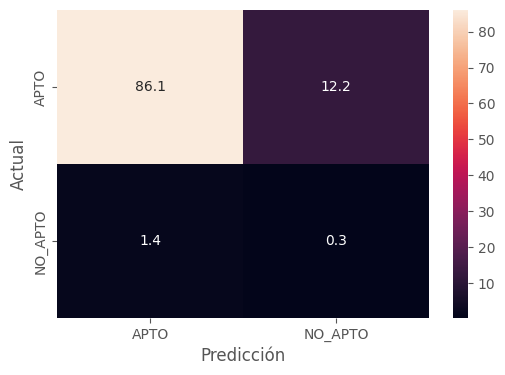

              precision    recall  f1-score   support

        APTO       0.98      0.88      0.93     34055
     NO_APTO       0.02      0.15      0.04       582

    accuracy                           0.86     34637
   macro avg       0.50      0.51      0.48     34637
weighted avg       0.97      0.86      0.91     34637



In [182]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [183]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.56


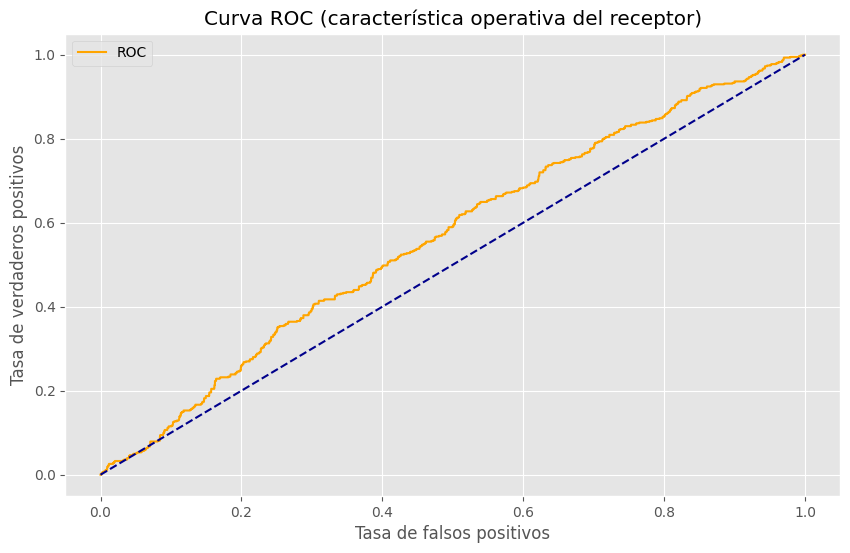

In [184]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

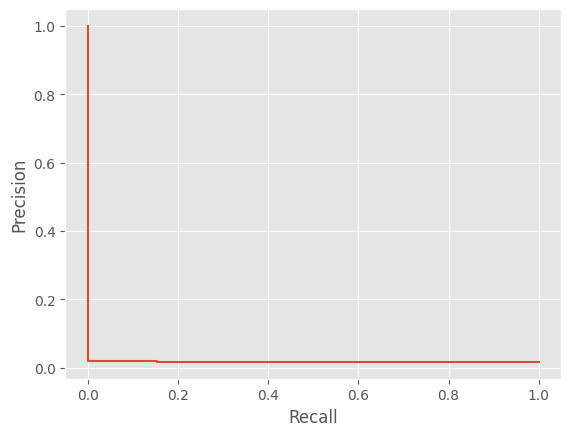

In [185]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### SMOTE

In [186]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [187]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'APTO': 34055, 'NO_APTO': 582})
Resampled dataset shape Counter({'APTO': 34055, 'NO_APTO': 34055})


####Busqueda de hiperparámetros 

In [188]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0         427500.000000      -12005          -4542                1   
1         427500.000000      -12005          -4542                1   
2         270000.000000      -19110          -3051                0   
3         270000.000000      -19110          -3051                0   
4         270000.000000      -19110          -3051                0   
...                 ...         ...            ...              ...   
68105      67500.000000      -18860           -462                0   
68106     114909.790078      -20536          -2053                0   
68107     225000.000000      -17741          -3293                0   
68108      90149.949182      -20161         365243                0   
68109      72000.000000      -12973           -355                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0         2.000000              1               1   
1               0           0         2.000000              1               1   
2               1           1         1.000000              0               0   
3               1           1         1.000000              0               0   
4               1           1         1.000000              0               0   
...           ...         ...              ...            ...             ...   
68105           0           0         1.118541              0               0   
68106           0           0         2.000000              0               0   
68107           0           0         2.000000              0               1   
68108           0           0         1.033322              0               0   
68109           0           0         2.830375              0               0   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
2                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
...                  ...  ...                                 ...   
68105                  0  ...                                   0   
68106                  0  ...                                   0   
68107                  1  ...                                   0   
68108                  0  ...                                   0   
68109                  0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
68105                         0                               0   
68106                         0                               0   
68107                         0                               0   
68108                         0                               0   
68109                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            .

In [189]:
banco_clientes_sinteticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   68110 non-null  float64
 1   DAYS_BIRTH                                         68110 non-null  int64  
 2   DAYS_EMPLOYED                                      68110 non-null  int64  
 3   FLAG_WORK_PHONE                                    68110 non-null  int64  
 4   FLAG_PHONE                                         68110 non-null  int64  
 5   FLAG_EMAIL                                         68110 non-null  int64  
 6   CNT_FAM_MEMBERS                                    68110 non-null  float64
 7   CODE_GENDER_M                                      68110 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     68110 non-null  uint8  
 9   FLAG_O

In [190]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [191]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [192]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [193]:
X_Completo = X
y_Completo = y

In [194]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con SMOTE

In [195]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [196]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 1000, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [197]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [198]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [199]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=1000, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

#### Accuracy

In [200]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [201]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
0.8515749054479314


#### Balanced accuracy score

In [202]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.5124400542683883


#### Pérdida de entropía cruzada (Log Loss)

In [203]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.3806087409182601

#### Matriz de confusión

In [204]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

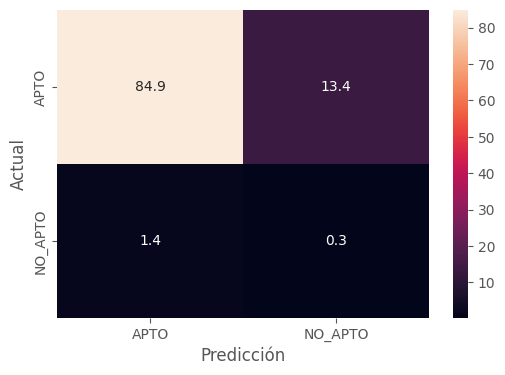

              precision    recall  f1-score   support

        APTO       0.98      0.86      0.92     34055
     NO_APTO       0.02      0.16      0.04       582

    accuracy                           0.85     34637
   macro avg       0.50      0.51      0.48     34637
weighted avg       0.97      0.85      0.90     34637



In [205]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [206]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.56


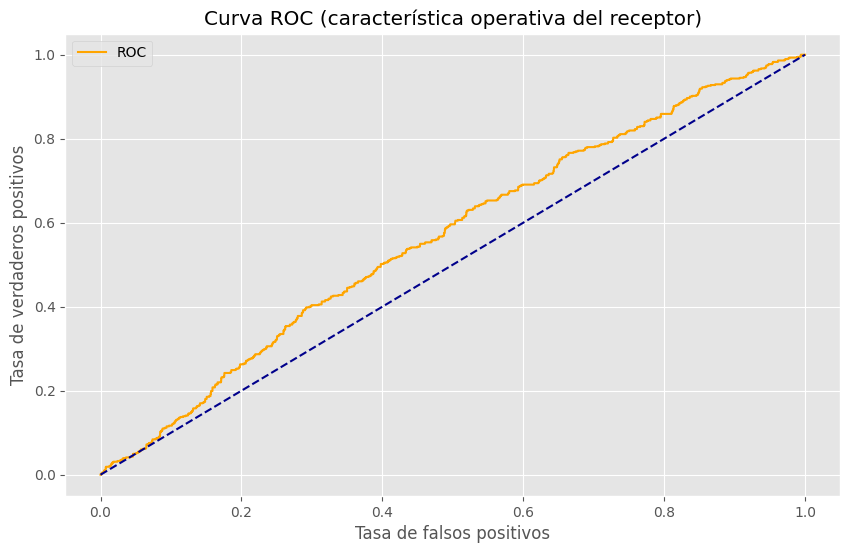

In [207]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

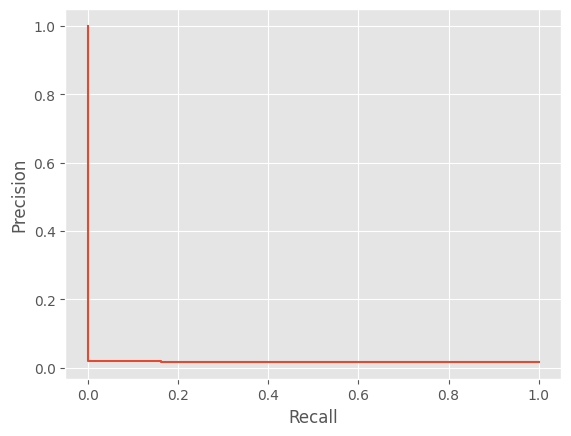

In [208]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Competencia de modelos

### **Sobremuestreo SMOTENC**

Despues de elegir el mejor metodo de sobremuestreo que fue SMOTENC se decide probar con los siguientes modelos

In [209]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [210]:
sm = SMOTENC(random_state=42, categorical_features=[0])
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'APTO': 34055, 'NO_APTO': 582})
Resampled dataset shape Counter({'APTO': 34055, 'NO_APTO': 34055})


In [211]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0              427500.0      -12005          -4542                1   
1              427500.0      -12005          -4542                1   
2              270000.0      -19110          -3051                0   
3              270000.0      -19110          -3051                0   
4              270000.0      -19110          -3051                0   
...                 ...         ...            ...              ...   
68105          450000.0      -18173           -619                0   
68106          112500.0      -20541          -2069                0   
68107          225000.0      -17803          -3247                0   
68108          162000.0      -21309         365243                0   
68109          247500.0      -15030           -305                1   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0               0           0         2.000000              1               1   
1               0           0         2.000000              1               1   
2               1           1         1.000000              0               0   
3               1           1         1.000000              0               0   
4               1           1         1.000000              0               0   
...           ...         ...              ...            ...             ...   
68105           0           0         1.118541              0               0   
68106           0           0         2.000000              0               0   
68107           0           0         2.000000              1               1   
68108           0           0         2.000000              0               0   
68109           1           0         2.830375              0               0   

       FLAG_OWN_REALTY_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                      1  ...                                   0   
1                      1  ...                                   0   
2                      1  ...                                   0   
3                      1  ...                                   0   
4                      1  ...                                   0   
...                  ...  ...                                 ...   
68105                  1  ...                                   0   
68106                  0  ...                                   0   
68107                  1  ...                                   0   
68108                  0  ...                                   0   
68109                  0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
68105                         0                               0   
68106                         0                               0   
68107                         0                               0   
68108                         0                               0   
68109                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            .

In [212]:
banco_clientes_sinteticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   68110 non-null  float64
 1   DAYS_BIRTH                                         68110 non-null  int64  
 2   DAYS_EMPLOYED                                      68110 non-null  int64  
 3   FLAG_WORK_PHONE                                    68110 non-null  int64  
 4   FLAG_PHONE                                         68110 non-null  int64  
 5   FLAG_EMAIL                                         68110 non-null  int64  
 6   CNT_FAM_MEMBERS                                    68110 non-null  float64
 7   CODE_GENDER_M                                      68110 non-null  uint8  
 8   FLAG_OWN_CAR_Y                                     68110 non-null  uint8  
 9   FLAG_O

In [213]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


### **Árbol de decisión**

#### Dividir el conjunto de datos

En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 


Se crea el modelo con la base de datos balanceada con datos sintéticos

In [214]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [215]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

#### Búsqueda de hiperparámetros

In [216]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha': np.linspace(0, 5, 10),
              'max_depth': [None],
             # 'max_depth': [3, 4, 5, 6, 7, 8, 30, 40, 50],
              'criterion': ['gini', 'entropy']}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None]},
             return_train_score=True, scoring='accuracy')

In [217]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

modelo_final = grid.best_estimator_

print(f"Alpha : {grid.best_params_['ccp_alpha']}")
print(f"Criterion : {grid.best_params_['criterion']}")
print(f"Max_depth : {grid.best_params_['max_depth']}")
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Alpha : 0.0
Criterion : gini
Max_depth : None
Profundidad del árbol: 41
Número de nodos terminales: 1249


#### Creación del modelo

In [218]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [219]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [220]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = grid.best_params_['max_depth'],
            criterion         = grid.best_params_['criterion'],
            random_state      = 123,
            ccp_alpha         = grid.best_params_['ccp_alpha'],
            max_leaf_nodes    = modelo_final.get_n_leaves()
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=1249, random_state=123)

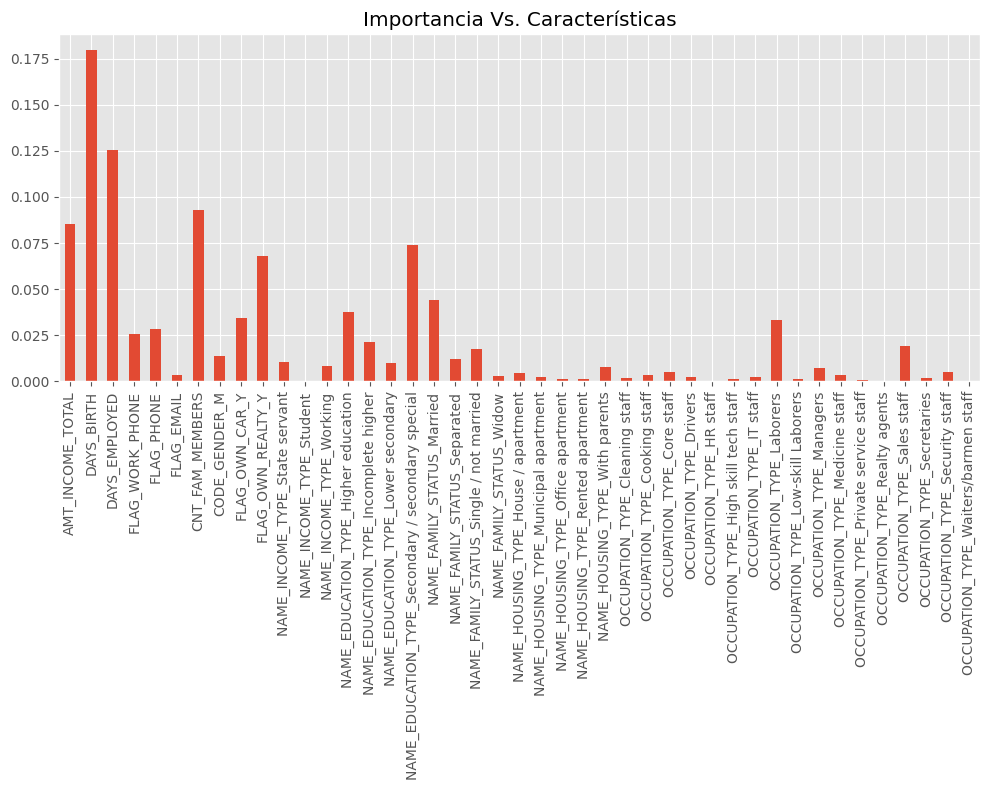

In [221]:
importances = pd.Series(modelo.feature_importances_, index=banco_columns)

fig, ax = plt.subplots(figsize= (10,8))
importances.plot.bar(ax=ax)
ax.set_title("Importancia Vs. Características")

fig.tight_layout()

#### Accuracy

In [222]:
y_1 = modelo.predict(X_test)
y_pred = modelo.predict_proba(X_test)

In [223]:
print("===========Accuracy ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy ================
0.987903109391691


#### Balanced accuracy score

In [224]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.7920307557867025


#### Pérdida de entropía cruzada (Log Loss)

In [225]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.03602795303369404

#### Matriz de confusión

In [226]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

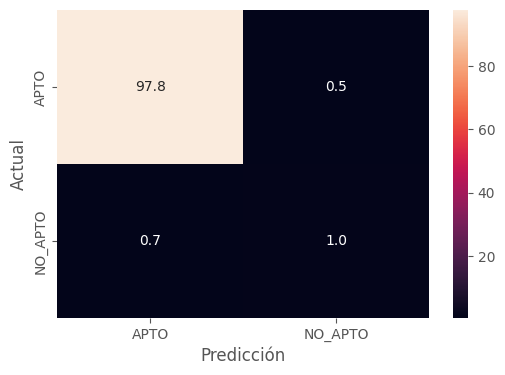

              precision    recall  f1-score   support

        APTO       0.99      0.99      0.99     34055
     NO_APTO       0.66      0.59      0.62       582

    accuracy                           0.99     34637
   macro avg       0.82      0.79      0.81     34637
weighted avg       0.99      0.99      0.99     34637



In [227]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [228]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.99


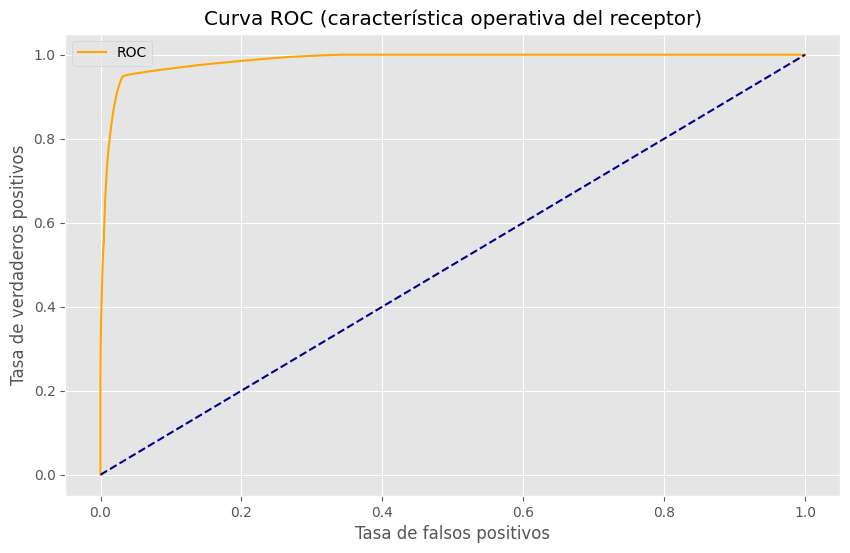

In [229]:
fig = plt.figure(figsize=(10,6))


probs = modelo.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

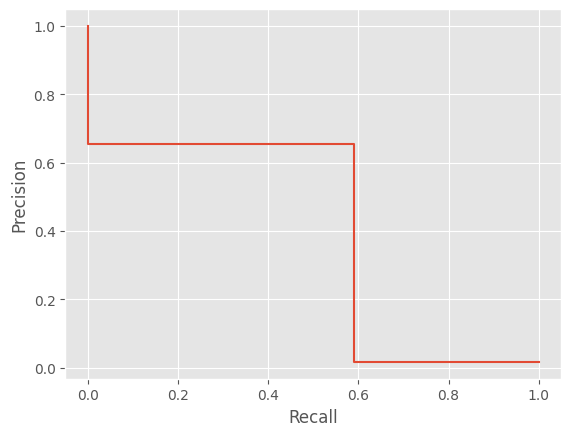

In [230]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### **AdaBoost**

#### Dividir el conjunto de datos

En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 


In [231]:
#Datos de entrenamiento y de prueba base de datos completa
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


#### Creación de modelo árbol de decisión simple 

In [232]:
#Creación del modelo 
#Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
#Entrenamiento del modelo con 80% de training
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [233]:
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.656/0.658


#### Búsqueda de hiperparámetros

In [234]:
#Grid Search basado en validación cruzada
ada2 = AdaBoostClassifier()
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [100, 150, 200],
             'learning_rate':[.0001, .001, 0.01, .1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = ada2,
        param_grid = param_grid,
        scoring    = 'balanced_accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

#grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
#resultados = pd.DataFrame(grid.cv_results_)
#resultados.filter(regex = '(param*|mean_t|std_t)') \
 #   .drop(columns = 'params') \
 #   .sort_values('mean_test_score', ascending = False)

In [235]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
#print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


In [236]:
best_params_Adaboost = {'learning_rate': 0.1, 'n_estimators': 2000}

#### Creación del modelo

Se crea el modelo con la base de datos balanceada con datos sintéticos

In [237]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [238]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [239]:
# Utilizando AdaBoost para aumentar la precisión
modelo = AdaBoostClassifier(base_estimator=tree, n_estimators=best_params_Adaboost['n_estimators'], learning_rate=best_params_Adaboost['learning_rate'], random_state=1)
# Ajustando los datos
modelo = modelo.fit(X_train, y_train)

In [240]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo.predict(X = X_test)

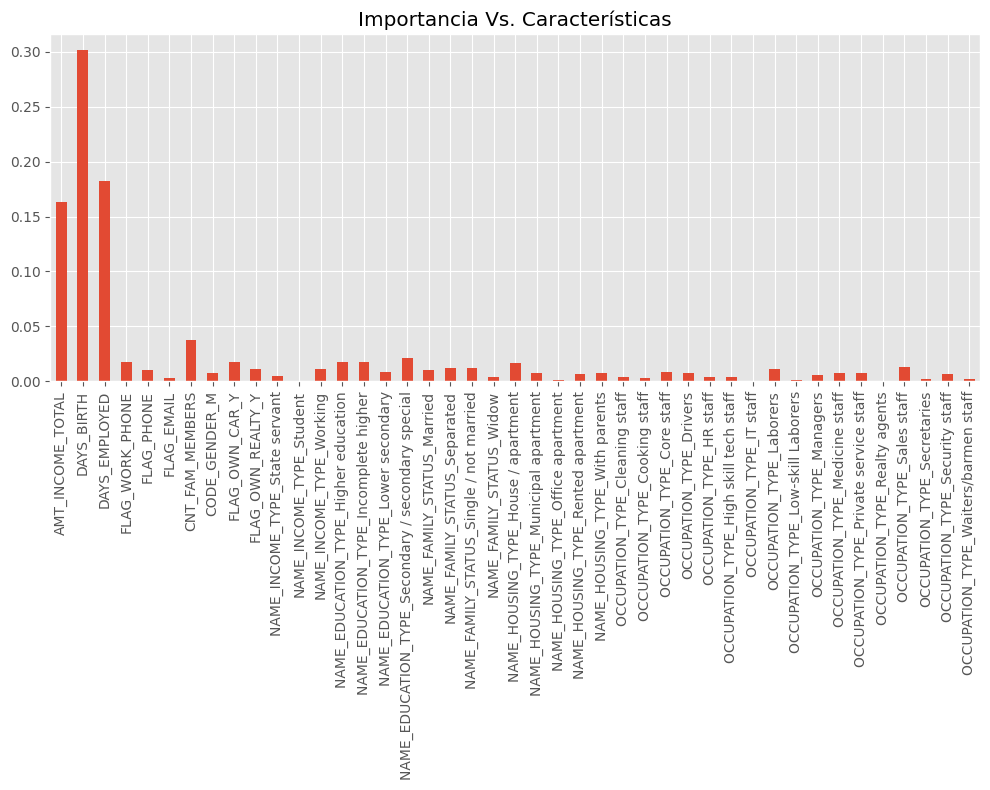

In [241]:
importances = pd.Series(modelo.feature_importances_, index=banco_columns)

fig, ax = plt.subplots(figsize= (10,8))
importances.plot.bar(ax=ax)
ax.set_title("Importancia Vs. Características")

fig.tight_layout()

#### Accuracy

In [242]:
y_1 = modelo.predict(X_test)
y_pred = modelo.predict_proba(X_test)

In [243]:
print("===========Accuracy ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy ================
0.9662788347720646


#### Balanced accuracy score

In [244]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.7253018288083608


#### Pérdida de entropía cruzada (Log Loss)

In [245]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.6792912546182361

#### Matriz de confusión

In [246]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

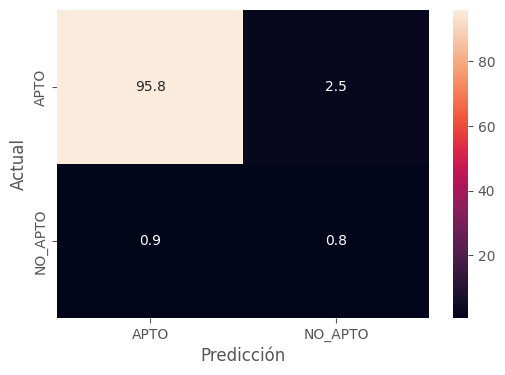

              precision    recall  f1-score   support

        APTO       0.99      0.97      0.98     34055
     NO_APTO       0.24      0.48      0.32       582

    accuracy                           0.97     34637
   macro avg       0.62      0.73      0.65     34637
weighted avg       0.98      0.97      0.97     34637



In [247]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [248]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.88


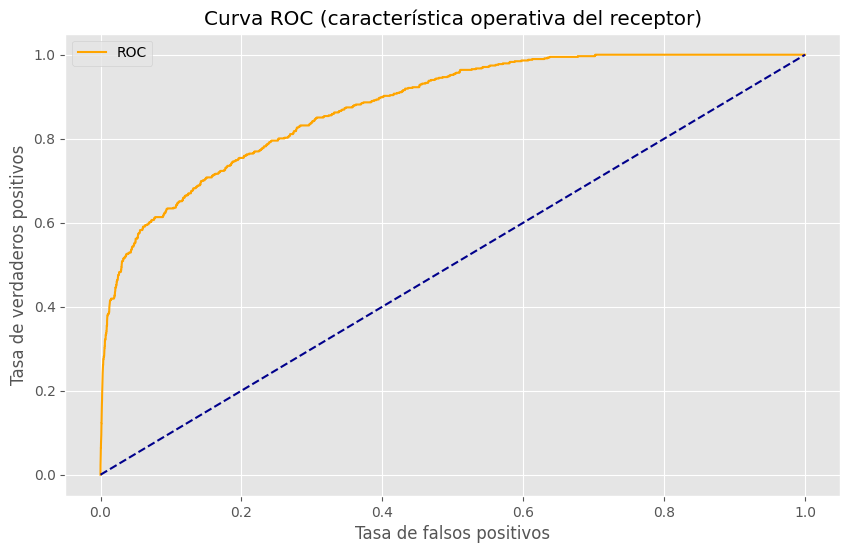

In [249]:
fig = plt.figure(figsize=(10,6))


probs = modelo.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

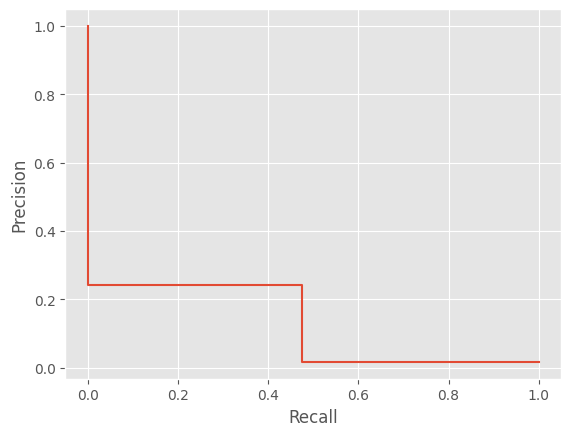

In [250]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### **Máquina de Soporte Vectorial**

####Busqueda de hiperparámetros 

In [251]:
y.replace('NO_APTO',1, inplace=True)
y.replace('APTO', 0,inplace=True)

In [252]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [253]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [254]:
SVC_model= LinearSVC()

parameters = {'C': [0.1, 1, 10]}
grid_SVC = GridSearchCV(SVC_model, param_grid=parameters, cv=5, verbose=3)

#grid_SVC_result = grid_SVC.fit(X_train,y_train) 

#grid_SVC_result

In [255]:
#best_params_SVC = grid_SVC_result.best_params_
#print('Best Parameters : ', best_params_SVC)

In [256]:
best_params_SVC = {'C': 0.1}

#### Creación del modelo

In [257]:
X_train = X_res
y_train = y_res
y_train.replace('NO_APTO', 1, inplace=True)
y_train.replace('APTO', 0, inplace=True)

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']
y_test.replace('NO_APTO', 1, inplace=True)
y_test.replace('APTO', 0, inplace=True)

In [258]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [259]:
model_SVC = LinearSVC(
    C = best_params_SVC["C"])

model_SVC.fit(X_train, y_train)

LinearSVC(C=0.1)

#### Accuracy

In [260]:
y_1 = model_SVC.predict(X_test)
#y_pred = model_SVC.predict_proba(X_test)

In [261]:
print("===========Accuracy ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy ================
0.8706296734705662


#### Balanced accuracy score

In [262]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.5128415929154425


#### Pérdida de entropía cruzada (Log Loss)

In [263]:
#y_test = np.array(y_test)
#log_loss(y_test, y_pred)

#### Matriz de confusión

In [264]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

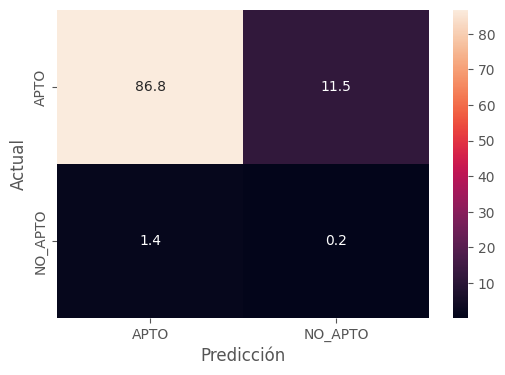

              precision    recall  f1-score   support

        APTO       0.98      0.88      0.93     34055
     NO_APTO       0.02      0.14      0.04       582

    accuracy                           0.87     34637
   macro avg       0.50      0.51      0.48     34637
weighted avg       0.97      0.87      0.92     34637



In [265]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Precision Recall Curve

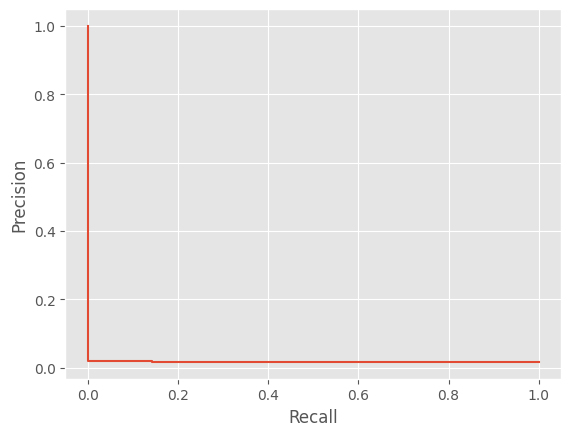

In [266]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### **Random Forest**

####Busqueda de hiperparámetros 

In [267]:
y.replace('NO_APTO',1, inplace=True)
y.replace('APTO', 0,inplace=True)

In [268]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [269]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [270]:
RF_model= RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 300, 500],
              'ccp_alpha': np.linspace(0, 5, 10),
              'max_depth': [None, 3, 5, 8, 10],
              'criterion': ['gini', 'entropy']}

grid_RF = GridSearchCV(
        estimator = RF_model,
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

#grid_RF.fit(X_train, y_train)


In [271]:
#best_params_RF = grid_RF.best_params_
#print('Best Parameters : ', best_params_RF)

In [272]:
best_params_RF = {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}

#### Creación del modelo

In [273]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [274]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [275]:
modelo = RandomForestClassifier(
    n_estimators = best_params_RF["n_estimators"],
    max_depth = best_params_RF["max_depth"],
    criterion = best_params_RF["criterion"],
    n_jobs = -1,
    class_weight = 'balanced')

modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150, n_jobs=-1)

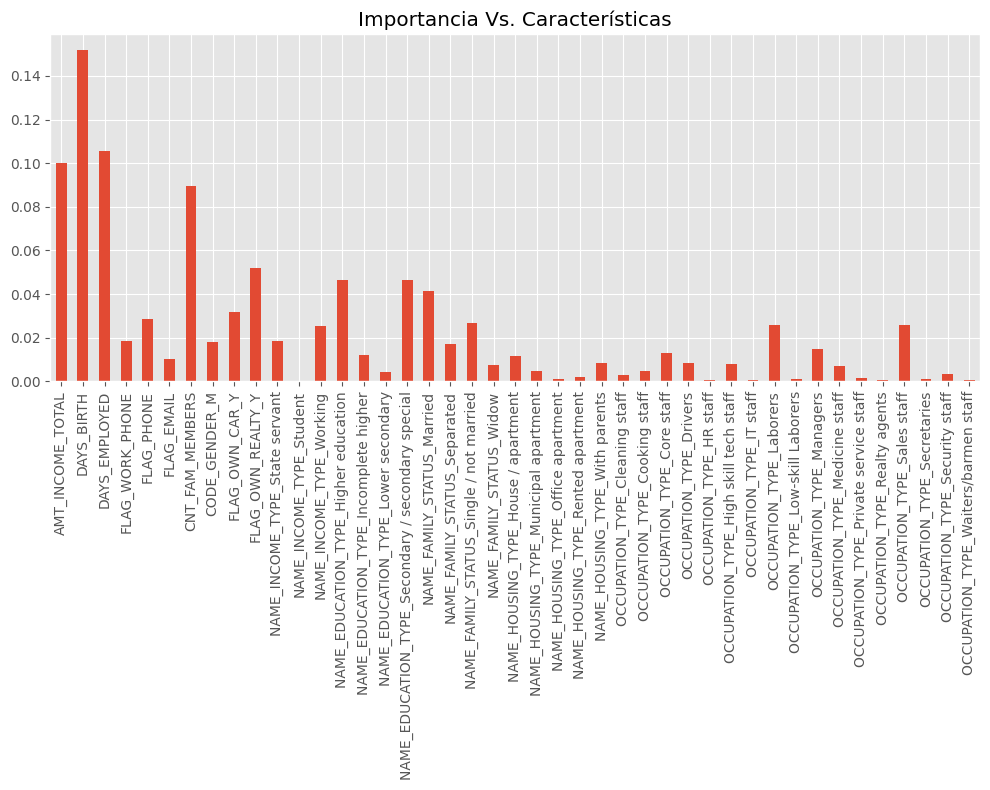

In [276]:
importances = pd.Series(modelo.feature_importances_, index=banco_columns)

fig, ax = plt.subplots(figsize= (10,8))
importances.plot.bar(ax=ax)
ax.set_title("Importancia Vs. Características")

fig.tight_layout()

#### Accuracy

In [277]:
y_1 = modelo.predict(X_test)
y_pred = modelo.predict_proba(X_test)

In [278]:
print("===========Accuracy ================")
print(metrics.accuracy_score(y_test, y_1))

===========Accuracy ================
0.9881918179980945


#### Balanced accuracy score

In [279]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


===========Balanced Accuracy Score ================
0.8082216406550753


#### Pérdida de entropía cruzada (Log Loss)

In [280]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

0.03511419754063552

#### Matriz de confusión

In [281]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

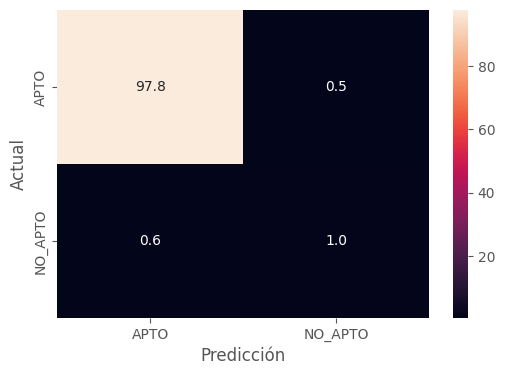

              precision    recall  f1-score   support

        APTO       0.99      0.99      0.99     34055
     NO_APTO       0.66      0.62      0.64       582

    accuracy                           0.99     34637
   macro avg       0.83      0.81      0.82     34637
weighted avg       0.99      0.99      0.99     34637



In [282]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [283]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.99


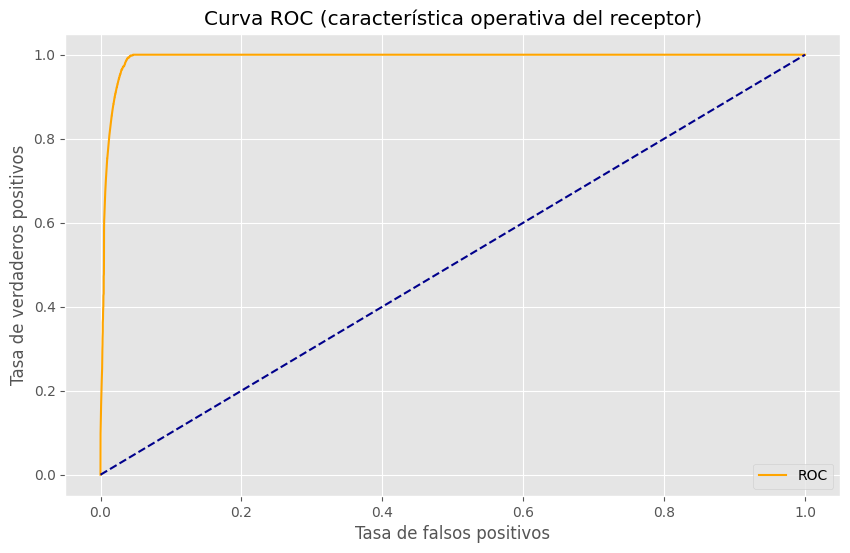

In [284]:
fig = plt.figure(figsize=(10,6))


probs = modelo.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

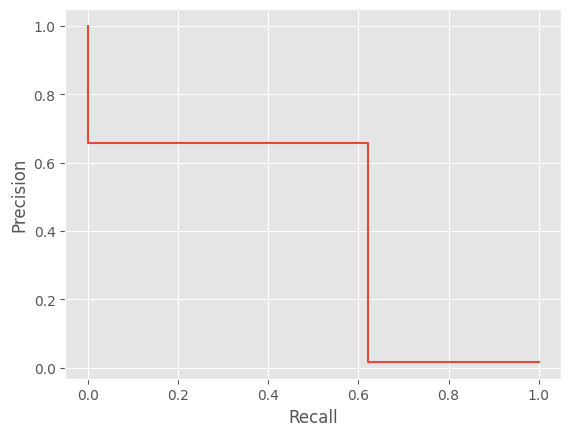

In [285]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Almacenamiento del mejor modelo

In [286]:
joblib.dump(modelo, 'mejor_modelo.joblib')

['mejor_modelo.joblib']

In [287]:
# Metodo para cargar el mejor modelo 
loaded_model = joblib.load('mejor_modelo.joblib')

In [288]:
y_loaded_model = loaded_model.predict(X_test)

In [289]:
print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_loaded_model))

===========Balanced Accuracy Score ================
0.8082216406550753


#Referencias


*   Credit Card Approval Prediction. (2021). https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv
*   The Complement Naive Bayes classifier described in Rennie et al. (2003). https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB
*   EDA & Vintage Analysis. (2021). https://www.kaggle.com/code/rikdifos/eda-vintage-analysis/notebook
*   CREDIT RISK: VINTAGE ANALYSIS. (2022). https://www.listendata.com/2019/09/credit-risk-vintage-analysis.html
*   Credit Card Approval Prediction Using ML. (2020). https://www.kaggle.com/code/rikdifos/credit-card-approval-prediction-using-ml/notebook
* The Potential of cohort Analysis for Vintage Analysis An Expliration. (2012) http://essay.utwente.nl/61383/1/MSc_M_Bosman.pdf

